Importing necessary libraries and exploring data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')


In [2]:
walmartdata = pd.read_csv("/content/Walmart_Store_sales.csv")

Preprocessing

In [3]:
walmartdata.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [4]:
walmartdata.info()
walmartdata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [5]:
walmartdata.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
walmartdata['Date'] = pd.to_datetime(walmartdata['Date'],format = '%d-%m-%Y' )

In [7]:
walmartdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [8]:
# Set 'Date' as the index
walmartdata.set_index('Date', inplace=True)
walmartdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB


In [9]:
walmartdata.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-12      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-03-05      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  
Date                                  
2010-02-05  211.096358         8.106  
2010-02-12  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-03-05  211.350143         8.106

In [10]:
from sklearn.preprocessing import MinMaxScaler
Scaler1 = MinMaxScaler()
walmartdata['Weekly_Sales'] = Scaler1.fit_transform(walmartdata[['Weekly_Sales']])
walmartdata['Temperature'] = Scaler1.fit_transform(walmartdata[['Temperature']])
walmartdata['Fuel_Price'] = Scaler1.fit_transform(walmartdata[['Fuel_Price']])
walmartdata['CPI'] = Scaler1.fit_transform(walmartdata[['CPI']])
walmartdata['Unemployment'] = Scaler1.fit_transform(walmartdata[['Unemployment']])


In [11]:
walmartdata.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1      0.397291             0     0.434149    0.050100   
2010-02-12      1      0.396811             1     0.396967    0.038076   
2010-02-19      1      0.388501             0     0.410861    0.021042   
2010-02-26      1      0.332458             0     0.476419    0.044589   
2010-03-05      1      0.372661             0     0.475147    0.076653   

                 CPI  Unemployment  
Date                                
2010-02-05  0.840500      0.405118  
2010-02-12  0.841941      0.405118  
2010-02-19  0.842405      0.405118  
2010-02-26  0.842707      0.405118  
2010-03-05  0.843008      0.405118

EDA

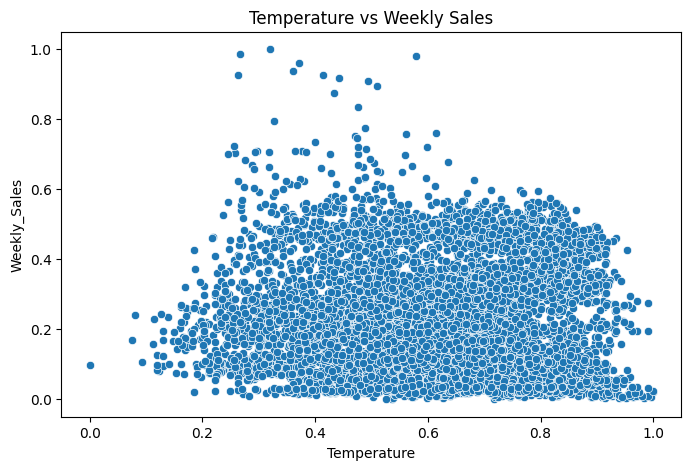

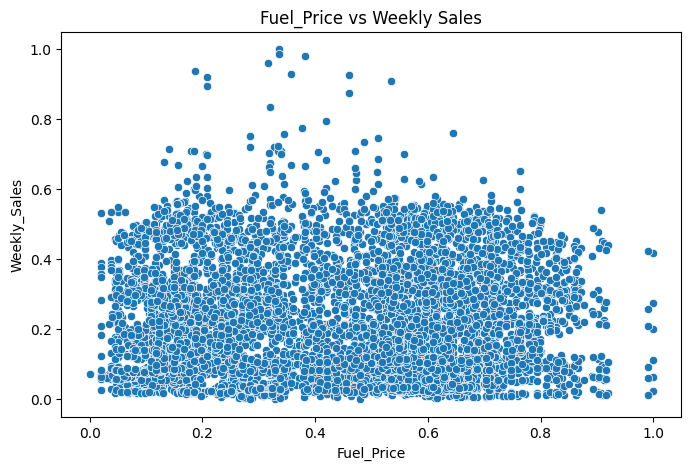

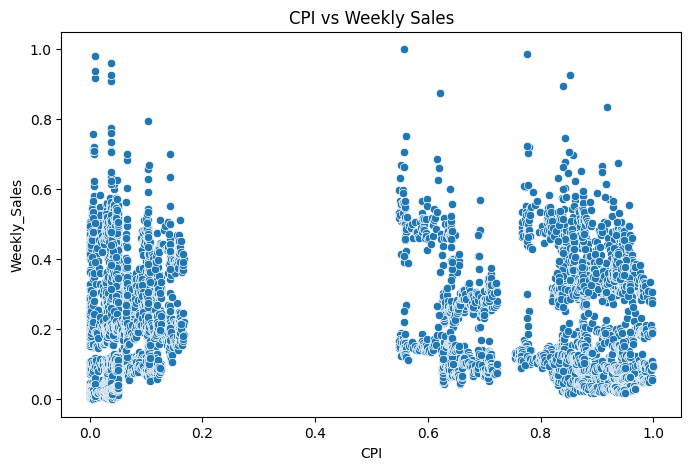

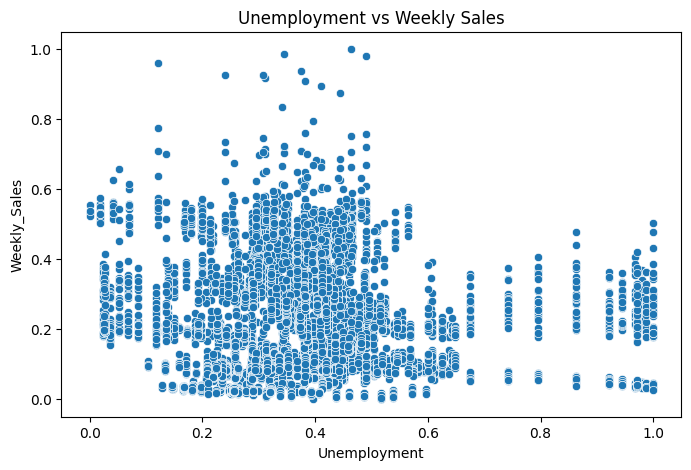

In [12]:
# Scatter plots
features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=walmartdata[feature], y=walmartdata['Weekly_Sales'])
    plt.title(f'{feature} vs Weekly Sales')
    plt.show()

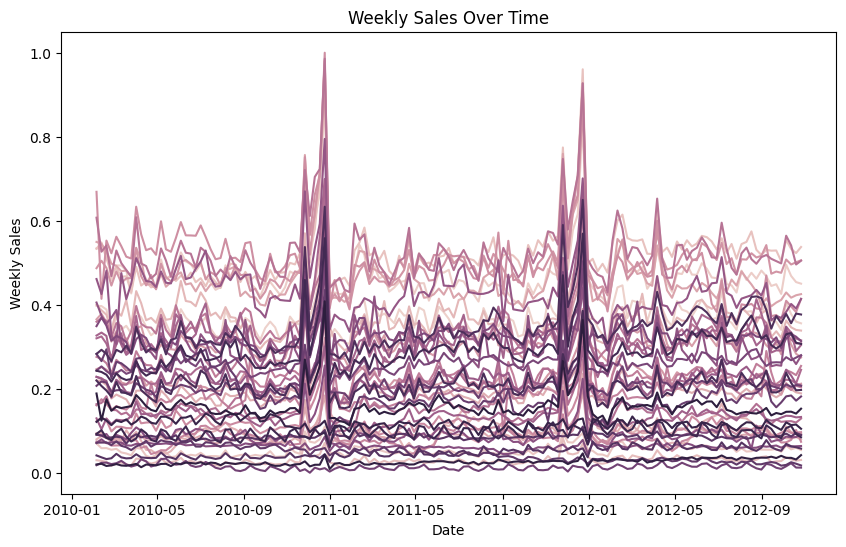

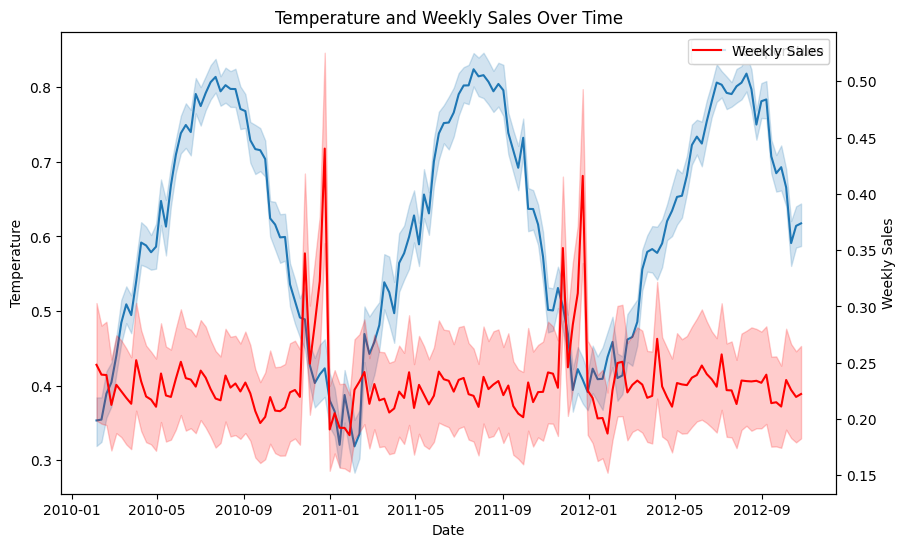

In [13]:
# Plot weekly sales over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=walmartdata.index, y=walmartdata['Weekly_Sales'], hue=walmartdata['Store'], legend=None)
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

# Plot temperature and weekly sales over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=walmartdata.index, y=walmartdata['Temperature'], label='Temperature')
plt.ylabel('Temperature')

# Second y-axis for weekly sales
ax2 = plt.twinx()
sns.lineplot(x=walmartdata.index, y=walmartdata['Weekly_Sales'], color='r', label='Weekly Sales', ax=ax2)
plt.ylabel('Weekly Sales')
plt.title('Temperature and Weekly Sales Over Time')
plt.show()


In [14]:
print(walmartdata.columns)

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')


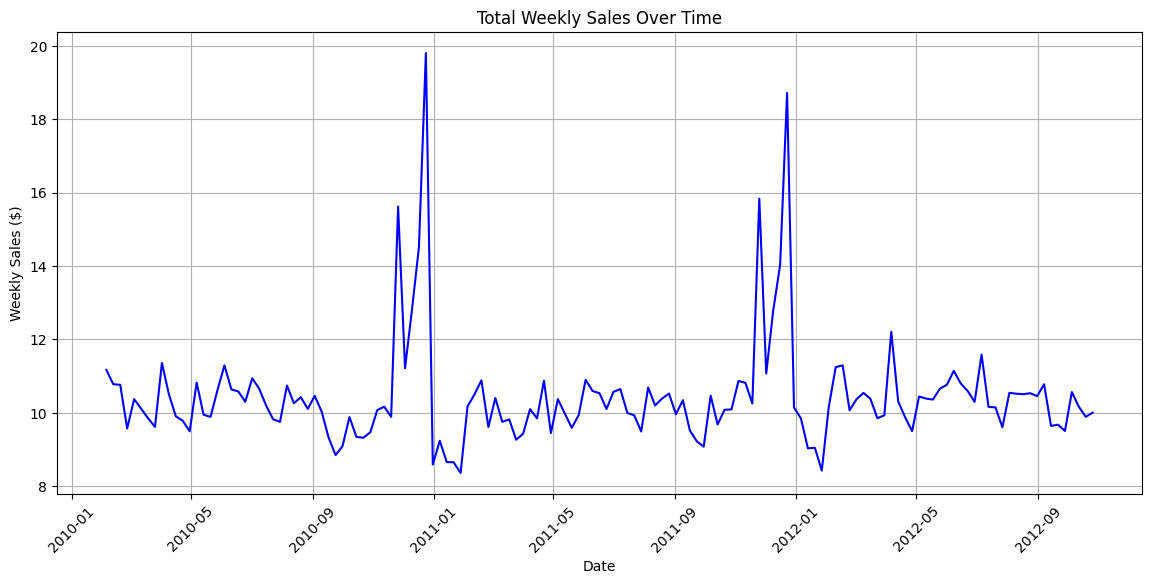

In [15]:
import matplotlib.pyplot as plt

# Group by date and sum weekly sales
sales_over_time =walmartdata.groupby('Date')['Weekly_Sales'].sum()

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(sales_over_time, color='blue')
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')
plt.xticks(rotation=45)
plt.grid()
plt.show()


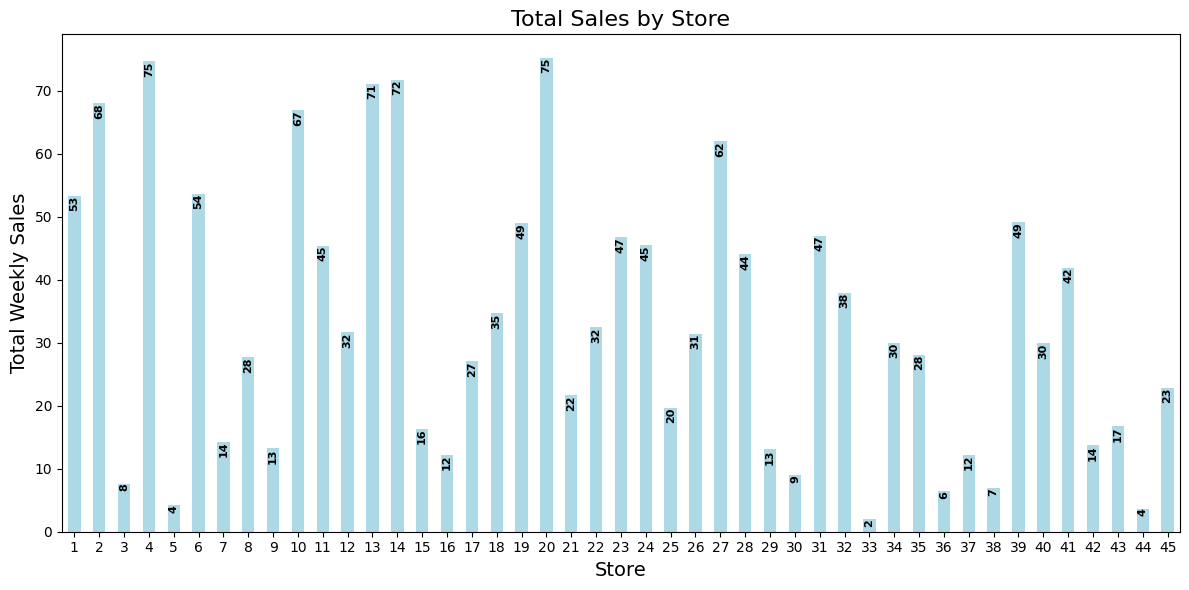

In [17]:
# Group by store and calculate total weekly sales
total_sales_by_store = walmartdata.groupby('Store')['Weekly_Sales'].sum()

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = total_sales_by_store.plot(kind='bar', color='lightblue')

# Add values on top of each bar
for bar in bars.patches:
    y_value = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             y_value,
             f'{y_value:.0f}',  # Format to integer
             ha='center',
             va='top',  # Position above the bar
             fontsize=8,rotation=90,weight='bold')

# Set titles and labels
plt.title('Total Sales by Store', fontsize=16)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Total Weekly Sales', fontsize=14)
plt.xticks(rotation=0)  # Rotate x-ticks if necessary
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

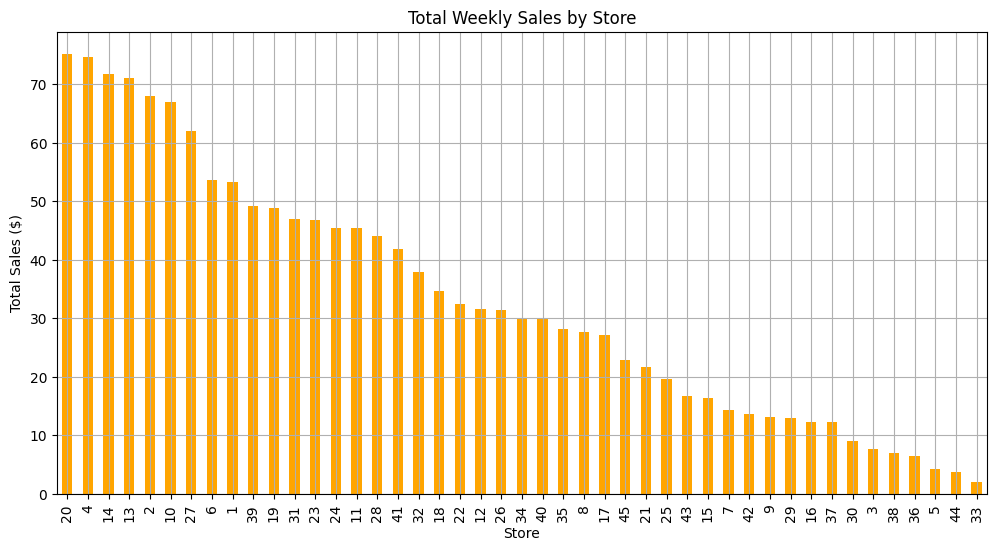

In [18]:
# Group by store and sum weekly sales
sales_by_store = walmartdata.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sales_by_store.plot(kind='bar', color='orange')
plt.title('Total Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales ($)')
plt.grid()
plt.show()


In [19]:
walmartdata.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1      0.397291             0     0.434149    0.050100   
2010-02-12      1      0.396811             1     0.396967    0.038076   
2010-02-19      1      0.388501             0     0.410861    0.021042   
2010-02-26      1      0.332458             0     0.476419    0.044589   
2010-03-05      1      0.372661             0     0.475147    0.076653   

                 CPI  Unemployment  
Date                                
2010-02-05  0.840500      0.405118  
2010-02-12  0.841941      0.405118  
2010-02-19  0.842405      0.405118  
2010-02-26  0.842707      0.405118  
2010-03-05  0.843008      0.405118

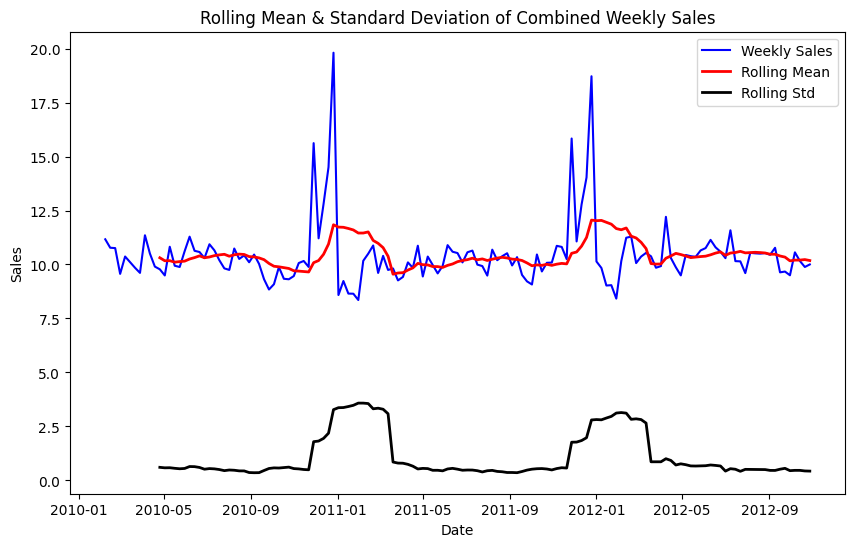

In [20]:

import pandas as pd
import matplotlib.pyplot as plt

weekly_sales_data = pd.DataFrame(walmartdata)

combined_weekly_sales = weekly_sales_data.resample('W')['Weekly_Sales'].sum()

rolling_mean = combined_weekly_sales.rolling(window=12).mean()
rolling_std = combined_weekly_sales.rolling(window=12).std()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(combined_weekly_sales, label='Weekly Sales', color='blue')
plt.plot(rolling_mean, color='red', label='Rolling Mean', linewidth=2)
plt.plot(rolling_std, color='black', label='Rolling Std', linewidth=2)
plt.title('Rolling Mean & Standard Deviation of Combined Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


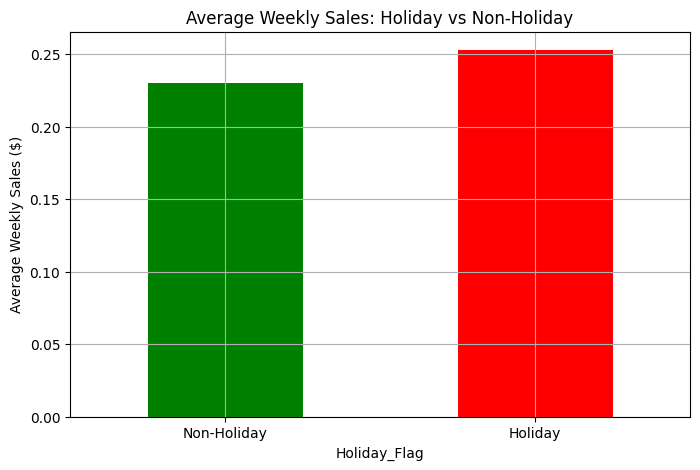

In [21]:
# Group by Holiday_Flag and sum weekly sales
sales_holiday = walmartdata.groupby('Holiday_Flag')['Weekly_Sales'].mean()

# Plotting
plt.figure(figsize=(8, 5))
sales_holiday.plot(kind='bar', color=['green', 'red'])
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.ylabel('Average Weekly Sales ($)')
plt.grid()
plt.show()


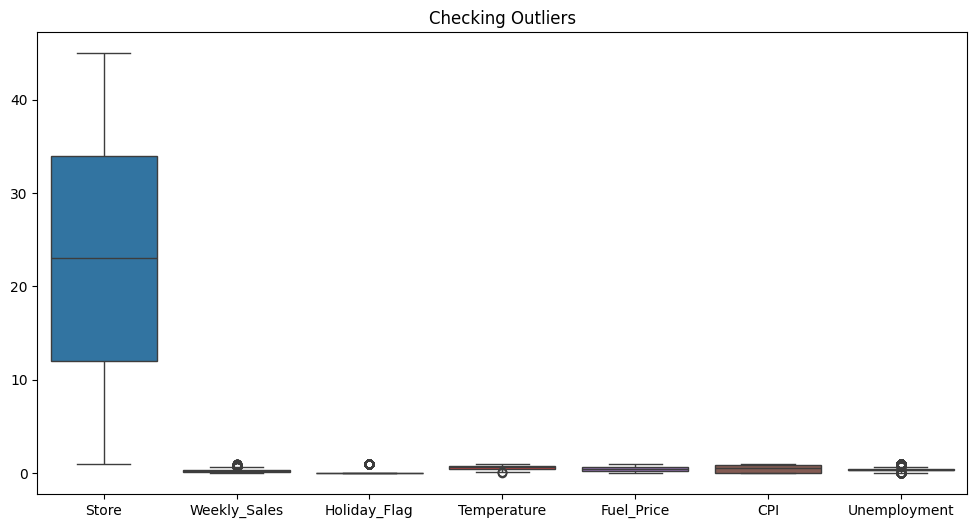

In [22]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.boxplot(data = walmartdata)
plt.title("Checking Outliers")
plt.show()

In [23]:
Q1 = walmartdata['Weekly_Sales'].quantile(0.25)
Q3 = walmartdata['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [24]:
walmartdata['Weekly_Sales'] = walmartdata['Weekly_Sales'].clip(lower=lower_bound, upper=upper_bound)

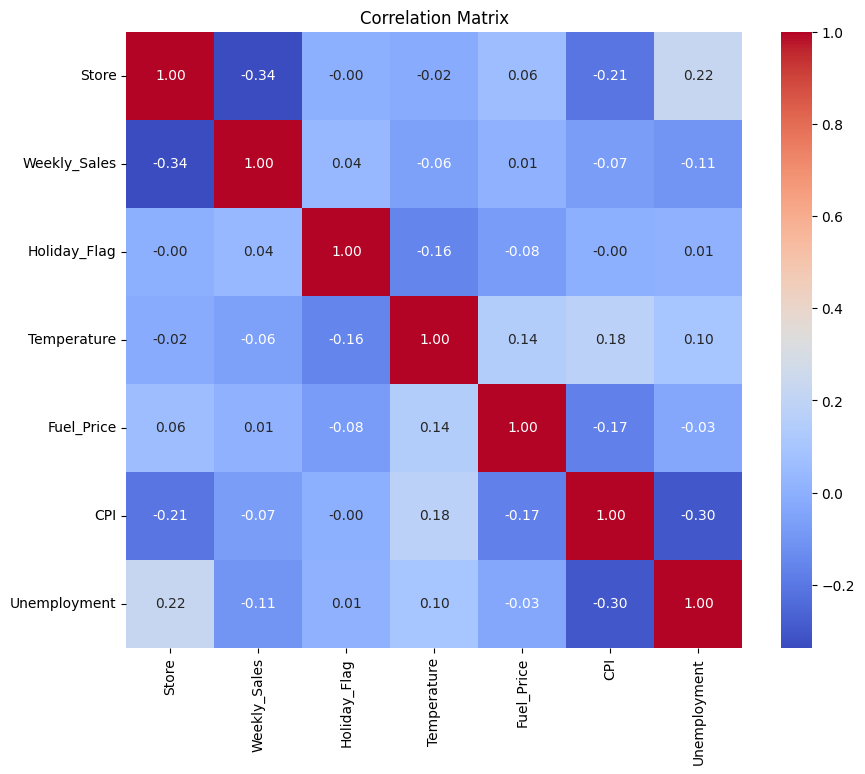

In [25]:
# Calculate correlation matrix
correlation_matrix = walmartdata.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


In [26]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

adf_test(weekly_sales_data['Weekly_Sales'])

ADF Statistic: -4.6241494985779745
p-value: 0.00011655869699917567


<Figure size 1200x600 with 0 Axes>

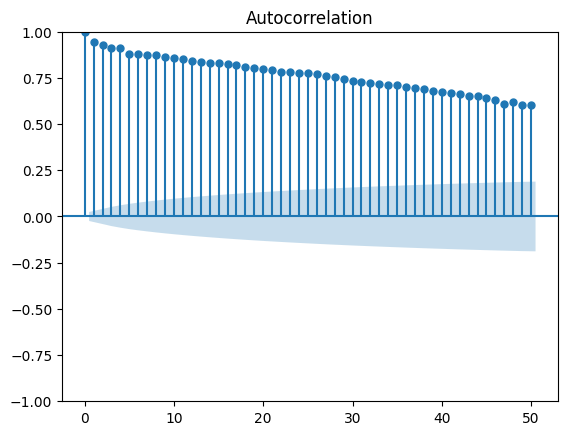

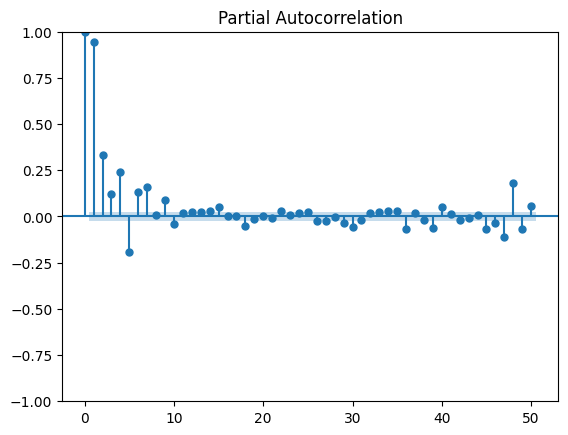

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(weekly_sales_data['Weekly_Sales'], lags=50)
plot_pacf(weekly_sales_data['Weekly_Sales'], lags=50)
plt.show()

In [28]:
from statsmodels.tsa.stattools import adfuller
store_numbers = walmartdata['Store'].unique()
adf_test_statistic = []
p_values = []
lags_used = []
observations_used = []
stationary_status = []

for store_number in store_numbers:
    test_store = walmartdata[walmartdata['Store'] == store_number]
    result = adfuller(test_store['Weekly_Sales'])
    adf_test_statistic.append(result[0])
    p_values.append(result[1])
    lags_used.append(result[2])
    observations_used.append(result[3])

    if result[1] <= 0.05:
        stationary_status.append('Yes')
    else:
        stationary_status.append('No')

result = pd.DataFrame({'Store': store_numbers,'ADF Test Statistic': adf_test_statistic,
    'P-value': p_values,'#Lags Used': lags_used,'Number of Observations Used': observations_used,
    'Stationary': stationary_status})

In [55]:
result

Store  ADF Test Statistic       P-value  #Lags Used  \
0       1           -5.102186  1.387779e-05           4   
1       2           -3.873677  2.237343e-03           6   
2       3           -2.963868  3.840926e-02           6   
3       4           -1.998995  2.870141e-01           8   
4       5           -4.310974  4.251706e-04           4   
5       6           -5.494236  2.141229e-06           4   
6       7           -4.476254  2.170072e-04           7   
7       8           -5.647653  1.002746e-06           4   
8       9           -5.008564  2.134309e-05           4   
9      10           -3.309592  1.445513e-02           6   
10     11           -3.762354  3.316837e-03           6   
11     12           -5.639346  1.045184e-06           4   
12     13           -5.781998  5.100376e-07           4   
13     14           -1.166682  6.877618e-01          12   
14     15           -5.565232  1.510016e-06           4   
15     16           -4.525758  1.766067e-04           4   
16     17           -5.292344  5.679177e-06           1   
17     18           -3.587395  6.006639e-03           6   
18     19           -5.618164  1.161473e-06           4   
19     20           -5.668179  9.049721e-07           4   
20     21           -5.492512  2.159382e-06           4   
21     22           -6.138139  8.092842e-08           4   
22     23           -5.991642  1.739977e-07           4   
23     24           -5.212712  8.281609e-06           4   
24     25           -5.543121  1.684108e-06           4   
25     26           -4.899731  3.491639e-05           4   
26     27           -5.291994  5.688665e-06           4   
27     28           -2.951209  3.970894e-02           8   
28     29           -5.798494  4.690703e-07           4   
29     30           -2.311254  1.683639e-01           6   
30     31           -4.392493  3.060459e-04           4   
31     32           -5.138199  1.174033e-05           4   
32     33           -4.137873  8.379552e-04          14   
33     34           -4.765122  6.338680e-05           4   
34     35           -3.691541  4.233730e-03           4   
35     36            0.213632  9.730159e-01           8   
36     37           -3.344322  1.300986e-02           3   
37     38           -0.360017  9.165635e-01          12   
38     39           -4.281374  4.783858e-04           4   
39     40           -5.381704  3.700165e-06           4   
40     41           -4.488249  2.064804e-04           4   
41     42           -1.649531  4.572852e-01          12   
42     43           -2.539930  1.060588e-01          11   
43     44           -0.983703  7.591619e-01           3   
44     45           -5.572899  1.453854e-06           4   

    Number of Observations Used Stationary  
0                           138        Yes  
1                           136        Yes  
2                           136        Yes  
3                           134         No  
4                           138        Yes  
5                           138        Yes  
6                           135        Yes  
7                           138        Yes  
8                           138        Yes  
9                           136        Yes  
10                          136        Yes  
11                          138        Yes  
12                          138        Yes  
13                          130         No  
14                          138        Yes  
15                          138        Yes  
16                          141        Yes  
17                          136        Yes  
18                          138        Yes  
19                          138        Yes  
20                          138        Yes  
21                          138        Yes  
22                          138        Yes  
23                          138        Yes  
24                          138        Yes  
25                          138        Yes  
26                          138        Yes  
27                          1

In [30]:
non_stationary_stores = result[result['Stationary'] == 'No']['Store'].tolist()
print(non_stationary_stores)

[4, 14, 30, 36, 38, 42, 43, 44]


In [31]:
non_stationary_walmartdata = walmartdata[walmartdata['Store'].isin(non_stationary_stores)].copy()
walmartdata = walmartdata[~walmartdata['Store'].isin(non_stationary_stores)].copy()

In [32]:
non_stationary_walmartdata.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [33]:
non_stationary_walmartdata.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      4      0.533477             0     0.448337    0.063126   
2010-02-12      4      0.548209             1     0.302348    0.050601   
2010-02-19      4      0.509844             0     0.376810    0.034068   
2010-02-26      4      0.475446             0     0.424853    0.059118   
2010-03-05      4      0.488007             0     0.445695    0.091182   

                 CPI  Unemployment  
Date                                
2010-02-05  0.003737      0.454667  
2010-02-12  0.004273      0.454667  
2010-02-19  0.004569      0.454667  
2010-02-26  0.004826      0.454667  
2010-03-05  0.005083      0.454667

In [34]:
non_stationary_walmartdata = non_stationary_walmartdata.sort_values(by=['Store', 'Date'])
non_stationary_walmartdata['Diff_Weekly_Sales'] = non_stationary_walmartdata.groupby('Store')['Weekly_Sales'].diff()

In [35]:
non_stationary_walmartdata.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      4      0.533477             0     0.448337    0.063126   
2010-02-12      4      0.548209             1     0.302348    0.050601   
2010-02-19      4      0.509844             0     0.376810    0.034068   
2010-02-26      4      0.475446             0     0.424853    0.059118   
2010-03-05      4      0.488007             0     0.445695    0.091182   

                 CPI  Unemployment  Diff_Weekly_Sales  
Date                                                   
2010-02-05  0.003737      0.454667                NaN  
2010-02-12  0.004273      0.454667           0.014732  
2010-02-19  0.004569      0.454667          -0.038365  
2010-02-26  0.004826      0.454667          -0.034398  
2010-03-05  0.005083      0.454667           0.012561

In [36]:
non_stationary_walmartdata.dropna(subset = ['Diff_Weekly_Sales'], inplace = True)

In [ ]:
store_numbers = non_stationary_walmartdata['Store'].unique()
adf_test_statistic = []
p_values = []
lags_used = []
observations_used = []
stationary_status = []

for store_number in store_numbers:
    test_store = non_stationary_walmartdata[non_stationary_walmartdata['Store'] == store_number]
    result = adfuller(test_store['Diff_Weekly_Sales'])

    adf_test_statistic.append(result[0])
    p_values.append(result[1])
    lags_used.append(result[2])
    observations_used.append(result[3])

    if result[1] <= 0.05:
        stationary_status.append('Yes')
    else:
        stationary_status.append('No')

# Creating the 'result' dataframe
result = pd.DataFrame({'Store': store_numbers, 'ADF Test Statistic': adf_test_statistic,
    'P-value': p_values,'#Lags Used': lags_used,'Number of Observations Used': observations_used,'Stationary': stationary_status})

In [37]:
result

Store  ADF Test Statistic       P-value  #Lags Used  \
0       1           -5.102186  1.387779e-05           4   
1       2           -3.873677  2.237343e-03           6   
2       3           -2.963868  3.840926e-02           6   
3       4           -1.998995  2.870141e-01           8   
4       5           -4.310974  4.251706e-04           4   
5       6           -5.494236  2.141229e-06           4   
6       7           -4.476254  2.170072e-04           7   
7       8           -5.647653  1.002746e-06           4   
8       9           -5.008564  2.134309e-05           4   
9      10           -3.309592  1.445513e-02           6   
10     11           -3.762354  3.316837e-03           6   
11     12           -5.639346  1.045184e-06           4   
12     13           -5.781998  5.100376e-07           4   
13     14           -1.166682  6.877618e-01          12   
14     15           -5.565232  1.510016e-06           4   
15     16           -4.525758  1.766067e-04           4   
16     17           -5.292344  5.679177e-06           1   
17     18           -3.587395  6.006639e-03           6   
18     19           -5.618164  1.161473e-06           4   
19     20           -5.668179  9.049721e-07           4   
20     21           -5.492512  2.159382e-06           4   
21     22           -6.138139  8.092842e-08           4   
22     23           -5.991642  1.739977e-07           4   
23     24           -5.212712  8.281609e-06           4   
24     25           -5.543121  1.684108e-06           4   
25     26           -4.899731  3.491639e-05           4   
26     27           -5.291994  5.688665e-06           4   
27     28           -2.951209  3.970894e-02           8   
28     29           -5.798494  4.690703e-07           4   
29     30           -2.311254  1.683639e-01           6   
30     31           -4.392493  3.060459e-04           4   
31     32           -5.138199  1.174033e-05           4   
32     33           -4.137873  8.379552e-04          14   
33     34           -4.765122  6.338680e-05           4   
34     35           -3.691541  4.233730e-03           4   
35     36            0.213632  9.730159e-01           8   
36     37           -3.344322  1.300986e-02           3   
37     38           -0.360017  9.165635e-01          12   
38     39           -4.281374  4.783858e-04           4   
39     40           -5.381704  3.700165e-06           4   
40     41           -4.488249  2.064804e-04           4   
41     42           -1.649531  4.572852e-01          12   
42     43           -2.539930  1.060588e-01          11   
43     44           -0.983703  7.591619e-01           3   
44     45           -5.572899  1.453854e-06           4   

    Number of Observations Used Stationary  
0                           138        Yes  
1                           136        Yes  
2                           136        Yes  
3                           134         No  
4                           138        Yes  
5                           138        Yes  
6                           135        Yes  
7                           138        Yes  
8                           138        Yes  
9                           136        Yes  
10                          136        Yes  
11                          138        Yes  
12                          138        Yes  
13                          130         No  
14                          138        Yes  
15                          138        Yes  
16                          141        Yes  
17                          136        Yes  
18                          138        Yes  
19                          138        Yes  
20                          138        Yes  
21                          138        Yes  
22                          138        Yes  
23                          138        Yes  
24                          138        Yes  
25                          138        Yes  
26                          138        Yes  
27                          1

In [38]:
print(walmartdata.columns)

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')


In [39]:
print(weekly_sales_data.columns)

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')


In [40]:
# Check if any missing values exist
print(walmartdata[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].isnull().sum())
print(weekly_sales_data['Weekly_Sales'].isnull().sum())

# Check the shape of both exog and dependent variable
print(walmartdata[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].shape)
print(weekly_sales_data['Weekly_Sales'].shape)


Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
0
(5291, 5)
(6435,)


Feature Engineering

In [41]:
def test_order(walmartdata, store_number):
    test_store = walmartdata[walmartdata['Store'] == store_number]
    time_series_data = test_store['Weekly_Sales'].values
    auto_model = auto_arima(time_series_data, start_p=1, start_q=1, max_p=3, max_q=3, m=52, start_P=0,
                            seasonal=True, d=None, D=0, trace=True, error_action='ignore',suppress_warnings=True,
                            stepwise=True)
    print(auto_model.summary())

In [42]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.6 MB/s eta 0:00:00


In [43]:
from pmdarima import auto_arima
def test_order1(walmartdata, store_number):
   #test_store = df[df['Store'] == store_number]
    time_series_data = test_store['Diff_Weekly_Sales'].values
    auto_model = auto_arima(time_series_data, start_p=1, start_q=1,max_p=3, max_q=3, m=52,
                            start_P=0, seasonal=True, d=None, D=0, trace=True,
                            error_action='ignore', suppress_warnings=True,stepwise=True)
    print(auto_model.summary())

In [44]:
non_stationary_walmartdata.reset_index(drop=True, inplace = True)

In [ ]:
test_order1(non_stationary_walmartdata, 44)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[52] intercept   : AIC=-1149.571, Time=8.56 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=-1034.629, Time=0.12 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=inf, Time=8.72 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=inf, Time=13.61 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=-1036.541, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=-1151.571, Time=2.68 sec
 ARIMA(1,0,1)(1,0,0)[52] intercept   : AIC=-1195.506, Time=4.64 sec
 ARIMA(1,0,1)(2,0,0)[52] intercept   : AIC=-1151.625, Time=12.42 sec
 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=-1147.572, Time=7.18 sec
 ARIMA(1,0,1)(2,0,1)[52] intercept   : AIC=-1145.572, Time=18.26 sec
 ARIMA(0,0,1)(1,0,0)[52] intercept   : AIC=-1191.682, Time=4.02 sec
 ARIMA(2,0,1)(1,0,0)[52] intercept   : AIC=-1191.285, Time=10.42 sec
 ARIMA(1,0,2)(1,0,0)[52] intercept   : AIC=-1191.978, Time=2.24 sec
 ARIMA(0,0,0)(1,0,0)[52] intercept   : AIC=inf, Time=1.40 sec
 ARIMA(0,0,2)(1,0,0

In [45]:
walmartdata.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1      0.397291             0     0.434149    0.050100   
2010-02-12      1      0.396811             1     0.396967    0.038076   
2010-02-19      1      0.388501             0     0.410861    0.021042   
2010-02-26      1      0.332458             0     0.476419    0.044589   
2010-03-05      1      0.372661             0     0.475147    0.076653   

                 CPI  Unemployment  
Date                                
2010-02-05  0.840500      0.405118  
2010-02-12  0.841941      0.405118  
2010-02-19  0.842405      0.405118  
2010-02-26  0.842707      0.405118  
2010-03-05  0.843008      0.405118

In [46]:
# Set Date as index
#df.set_index('Date', inplace=True)


# Resample to weekly frequency, summing the sales
weekly_sales = walmartdata['Weekly_Sales'].resample('W').sum()


Model Building

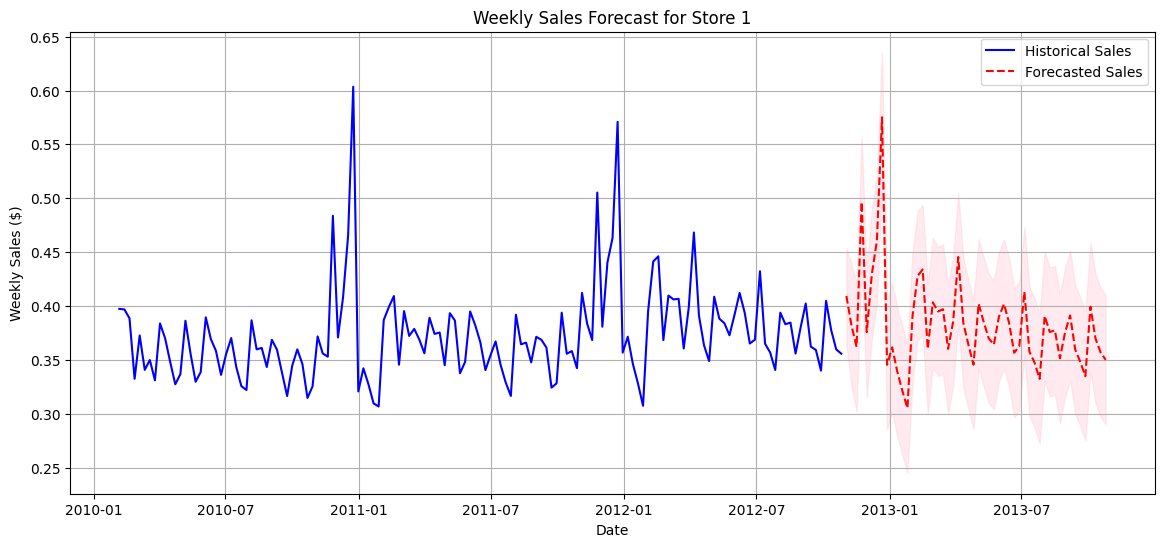

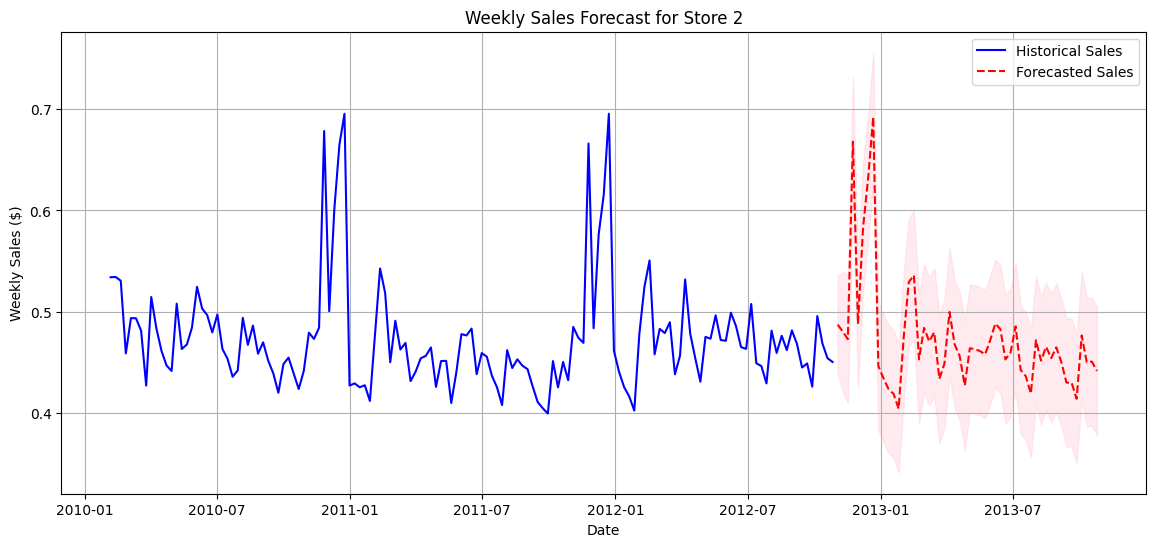

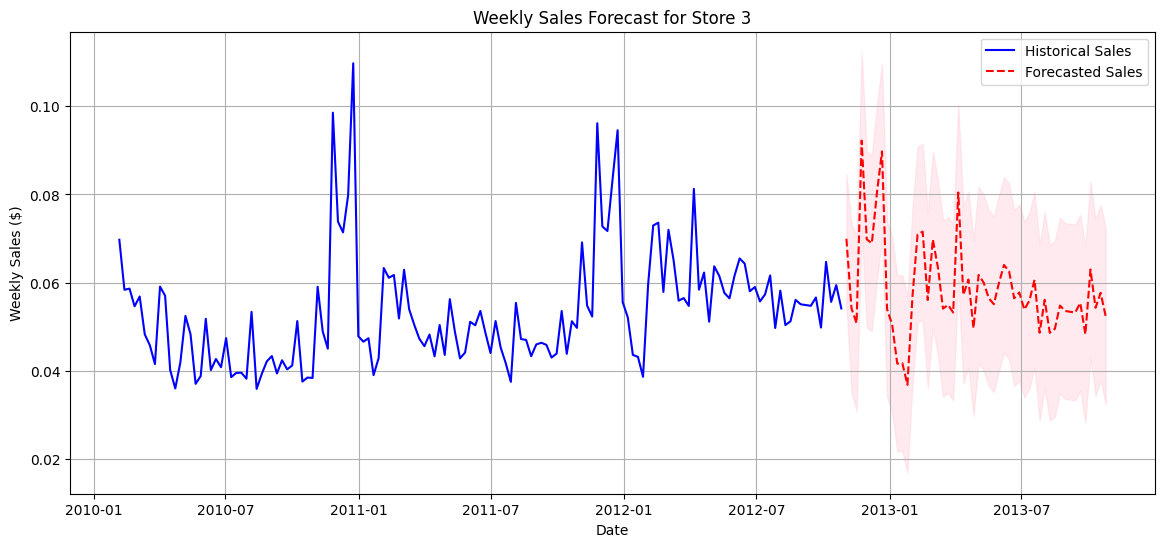

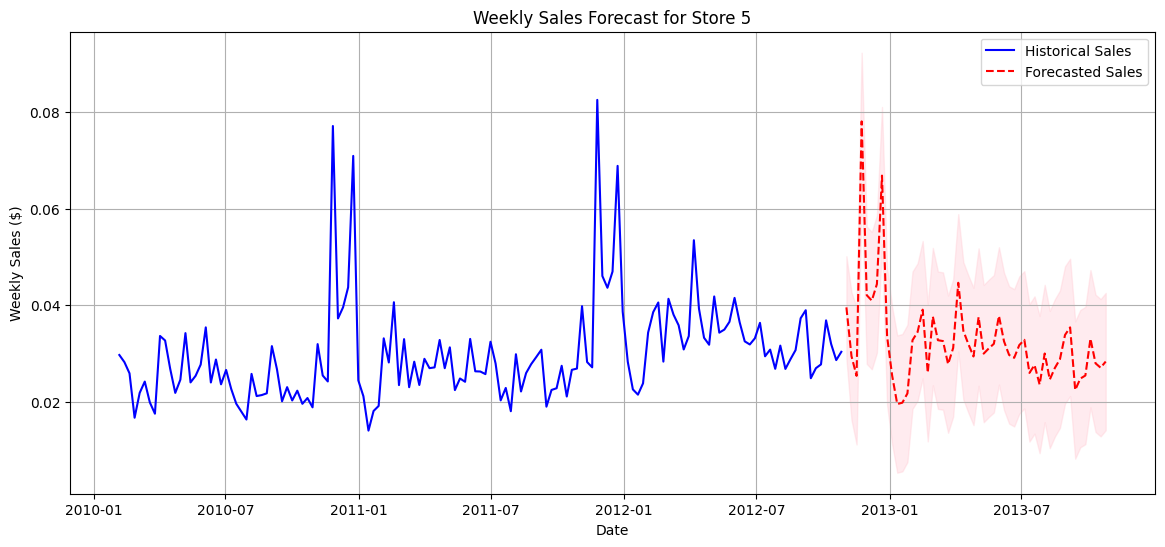

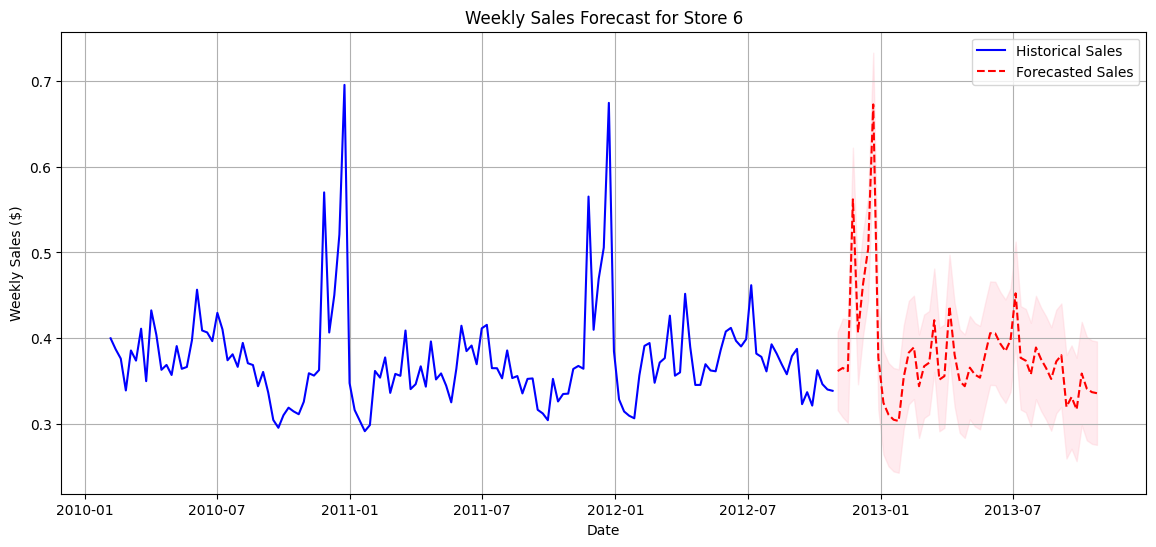

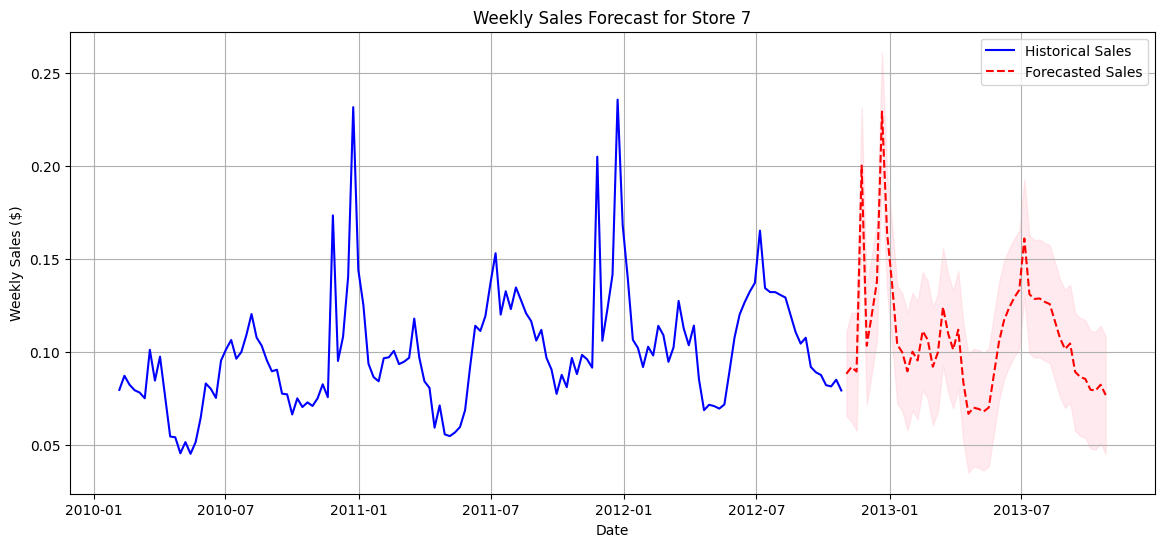

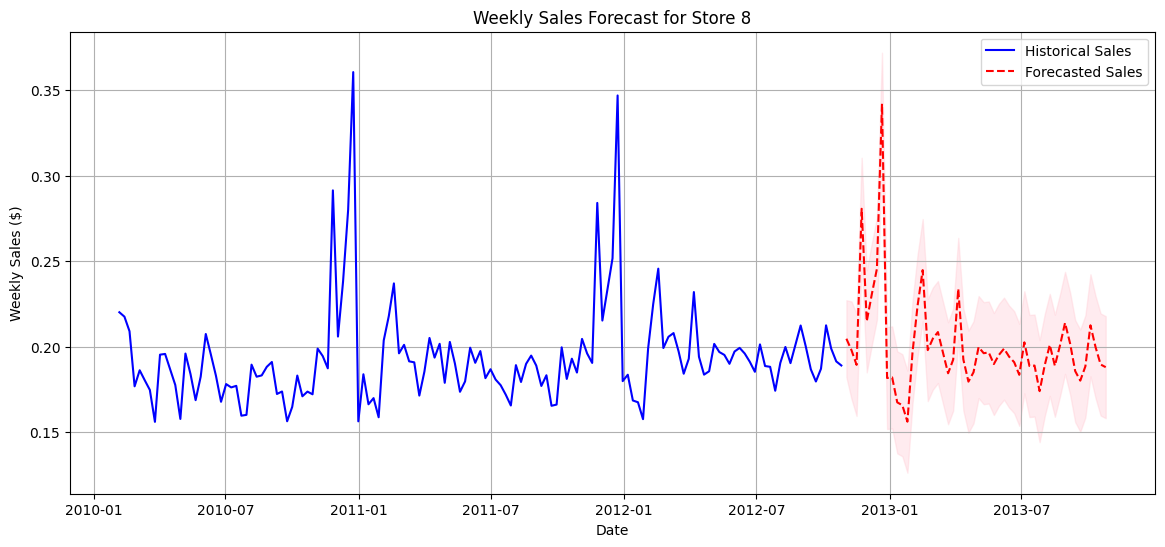

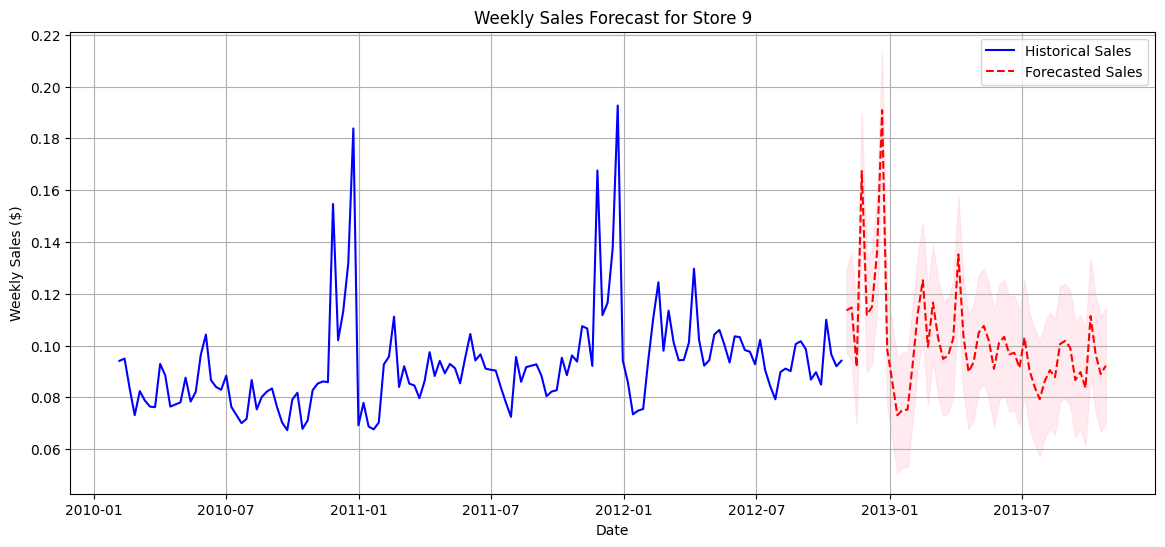

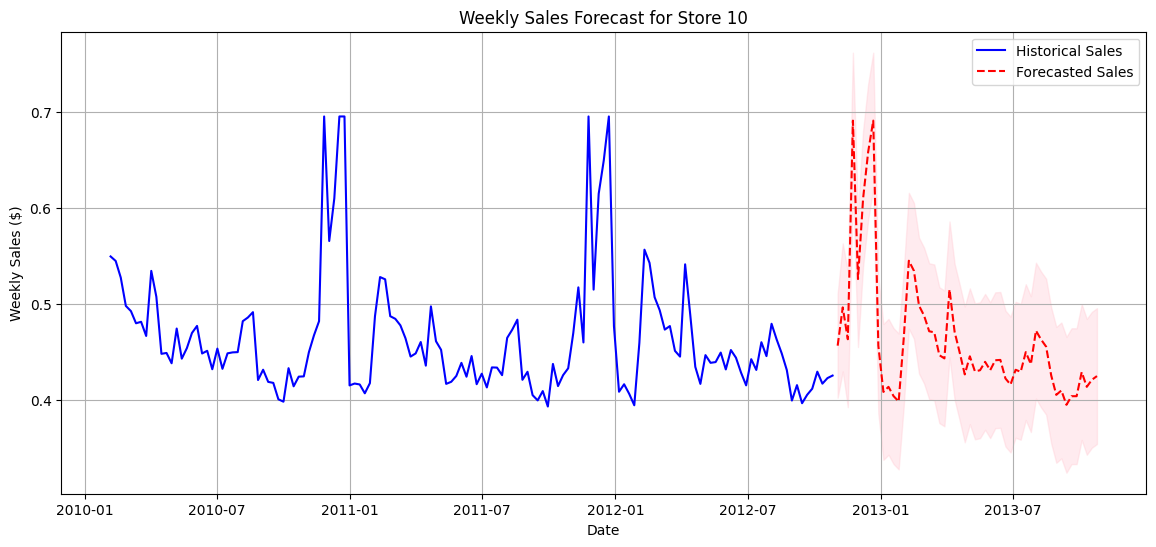

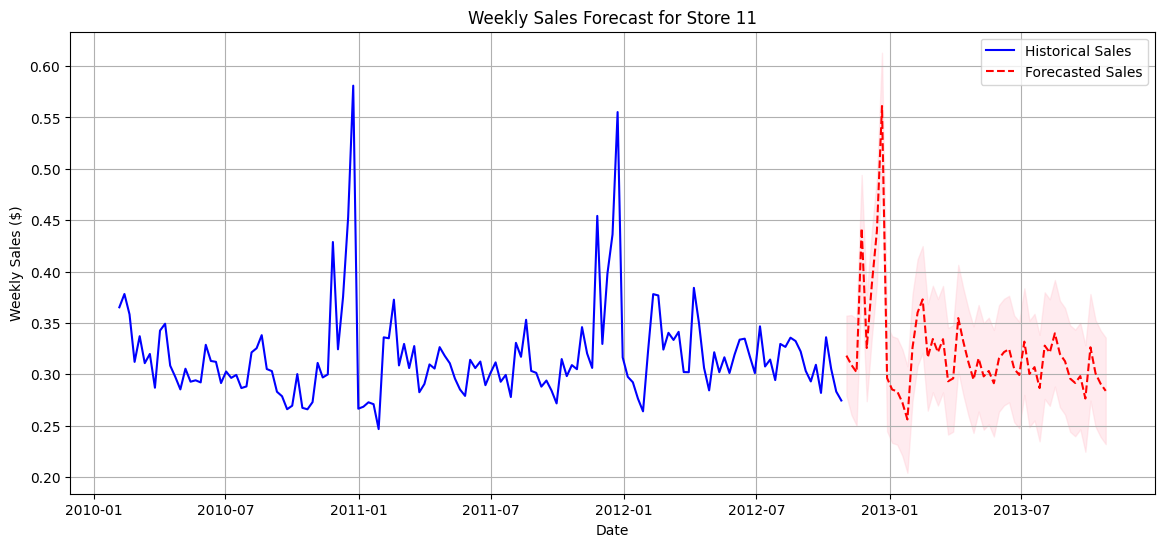

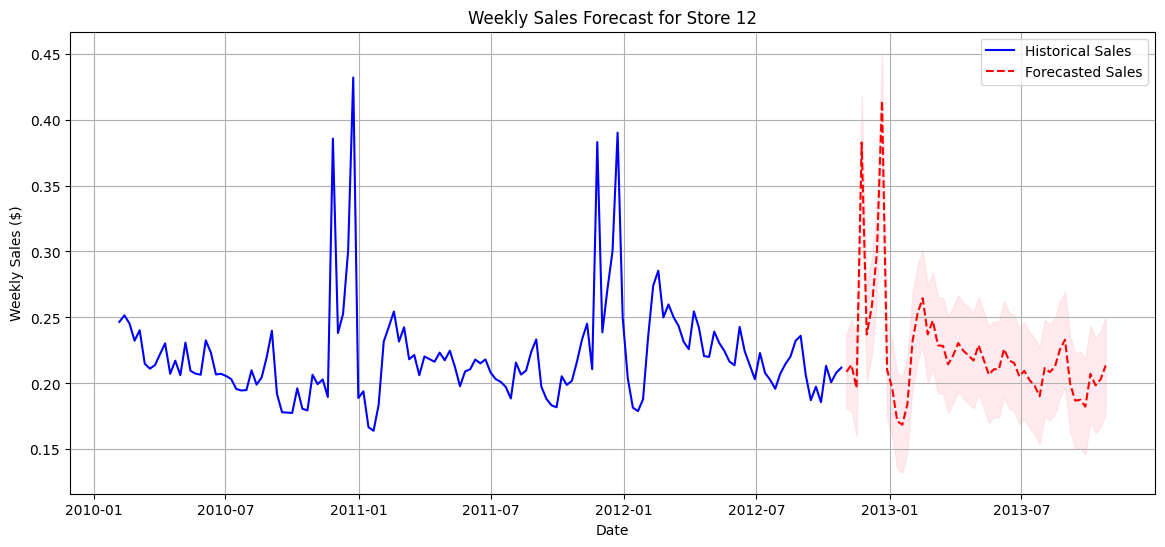

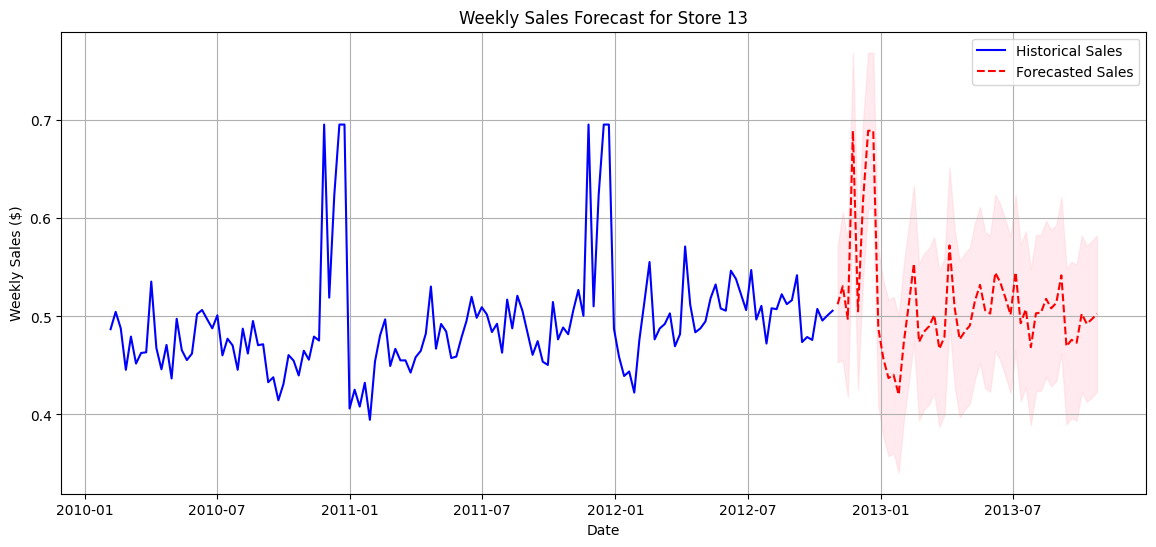

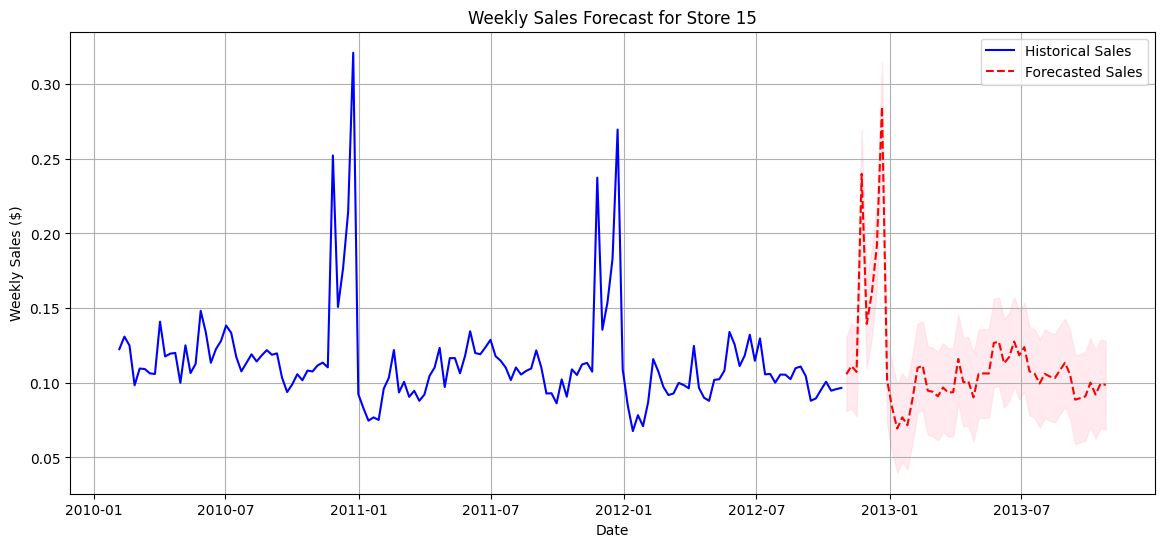

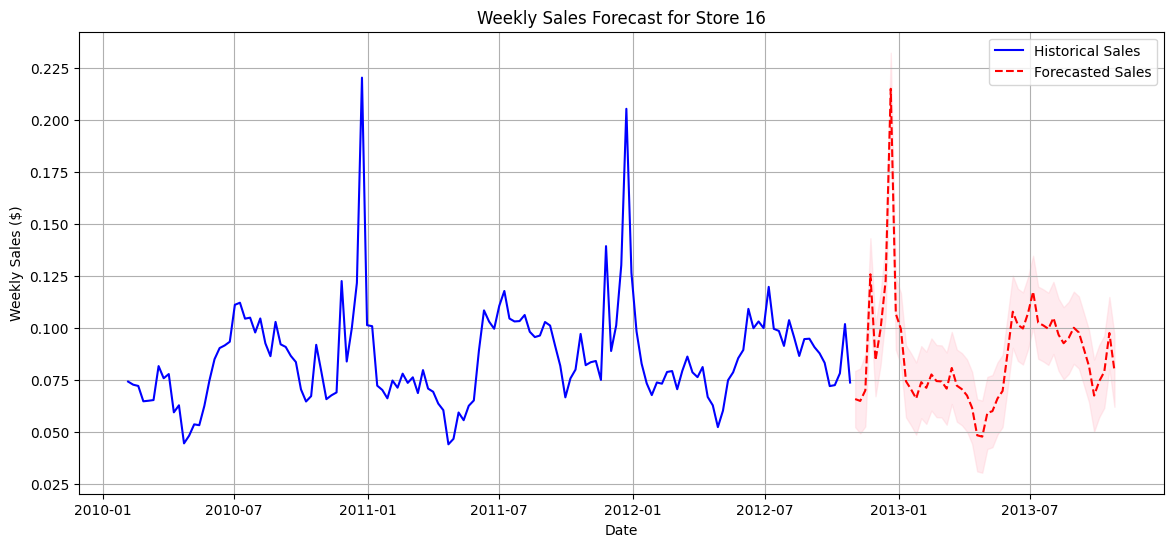

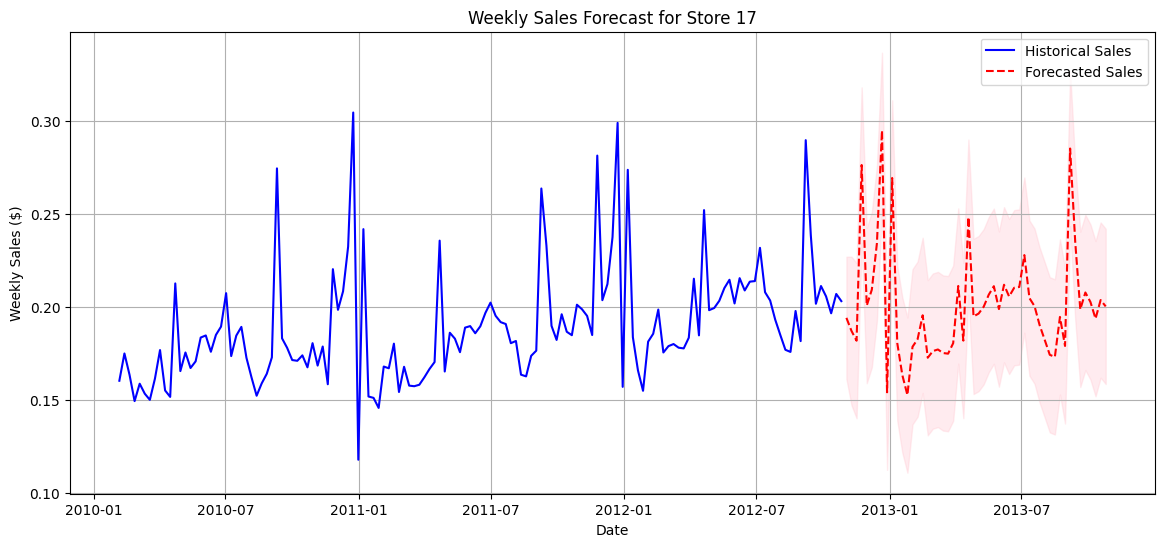

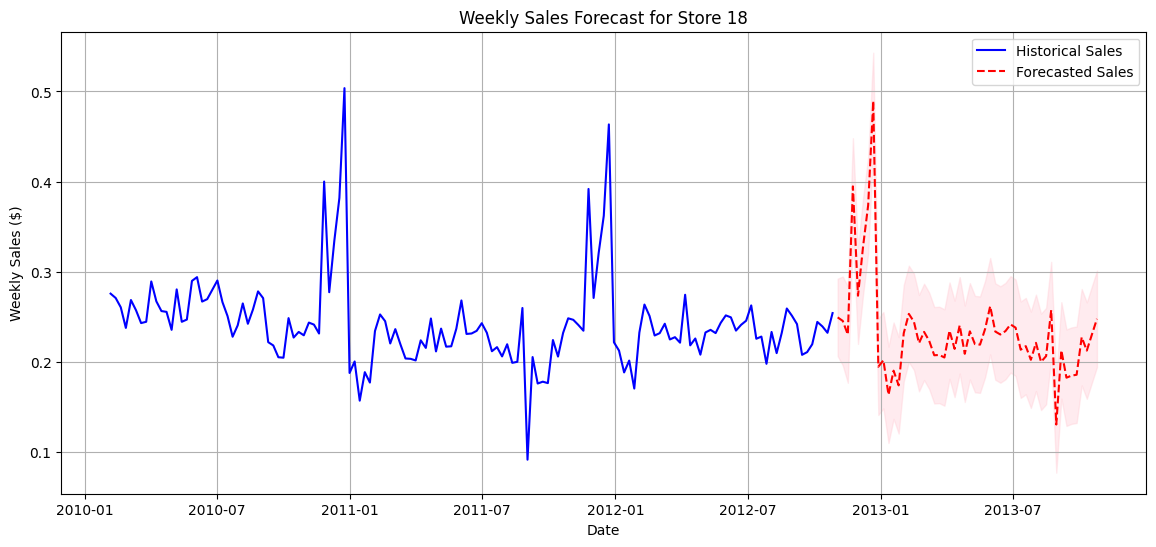

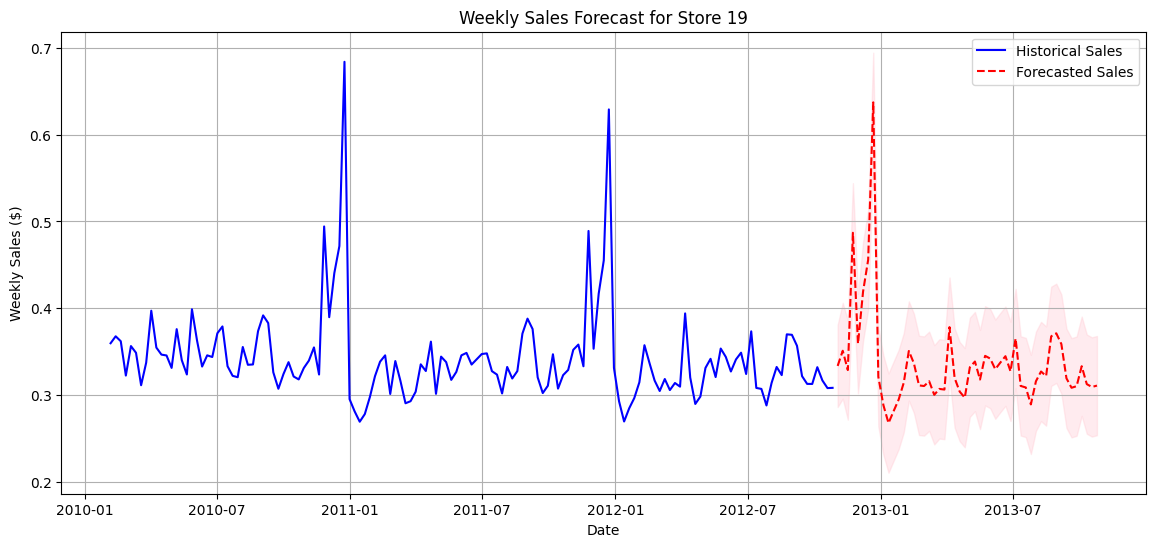

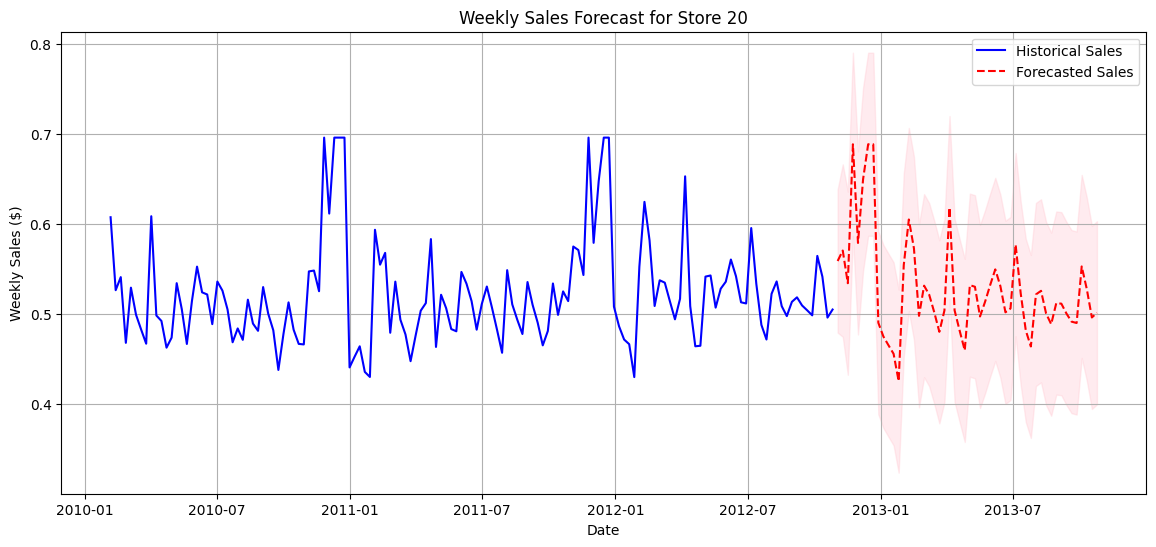

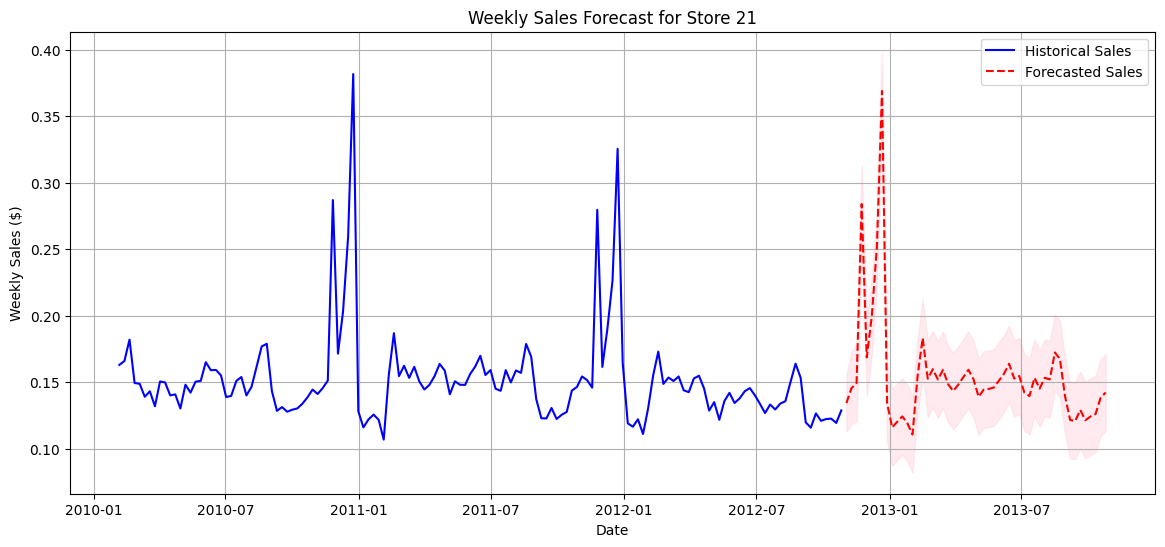

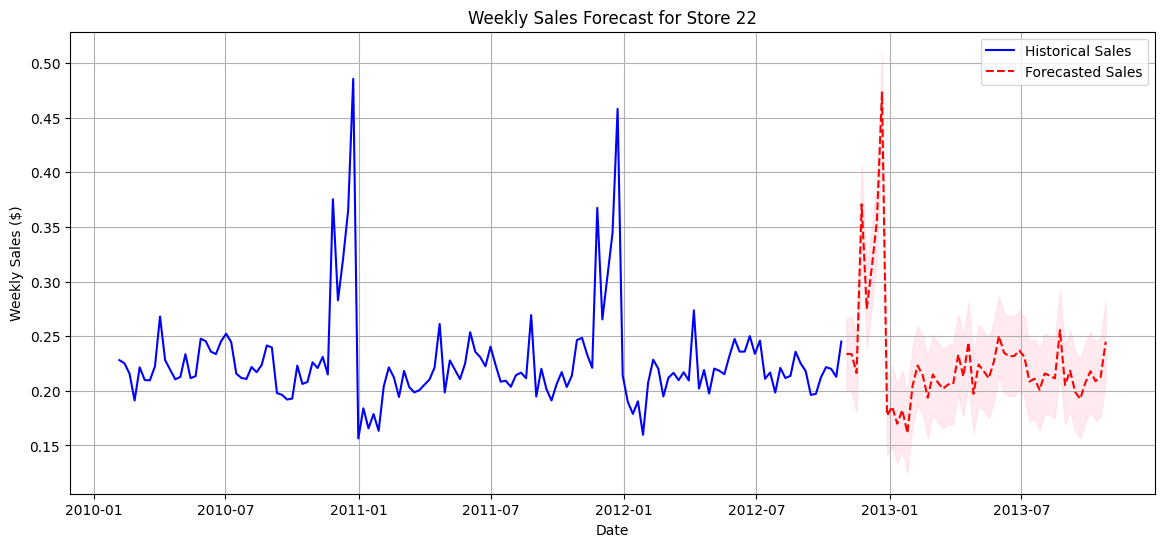

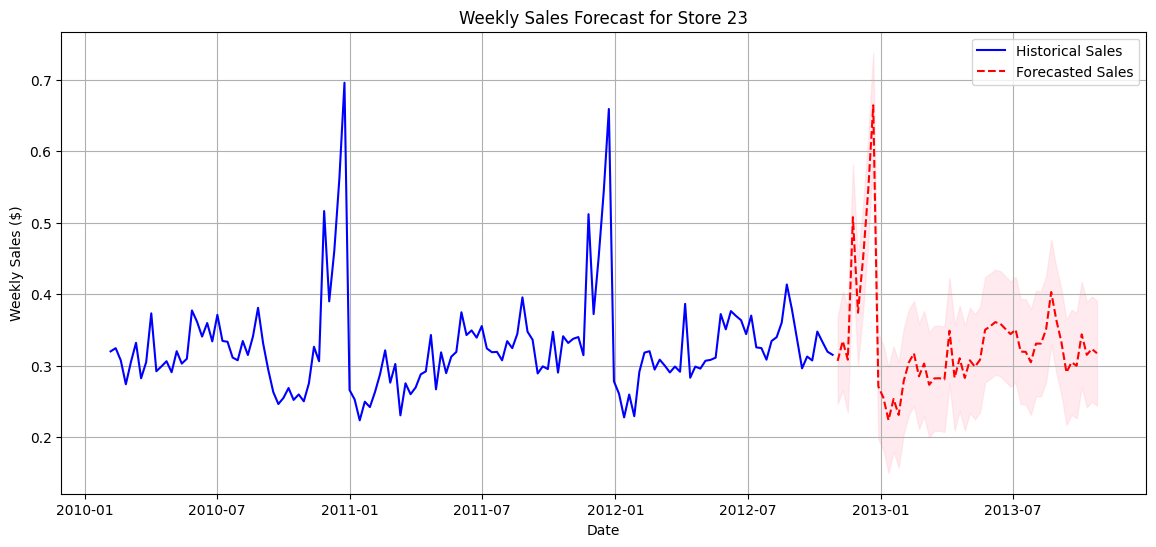

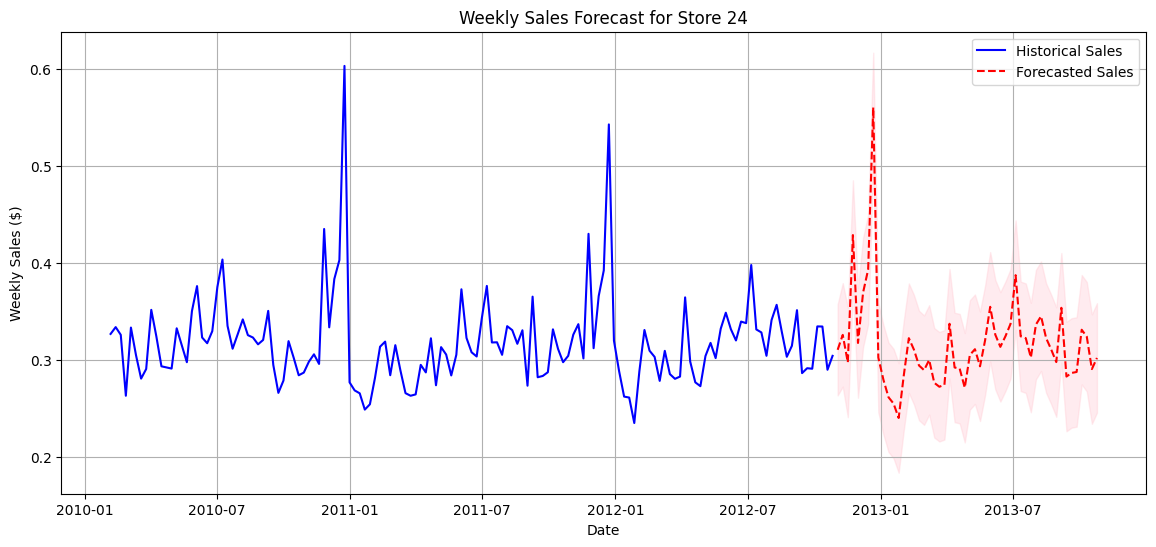

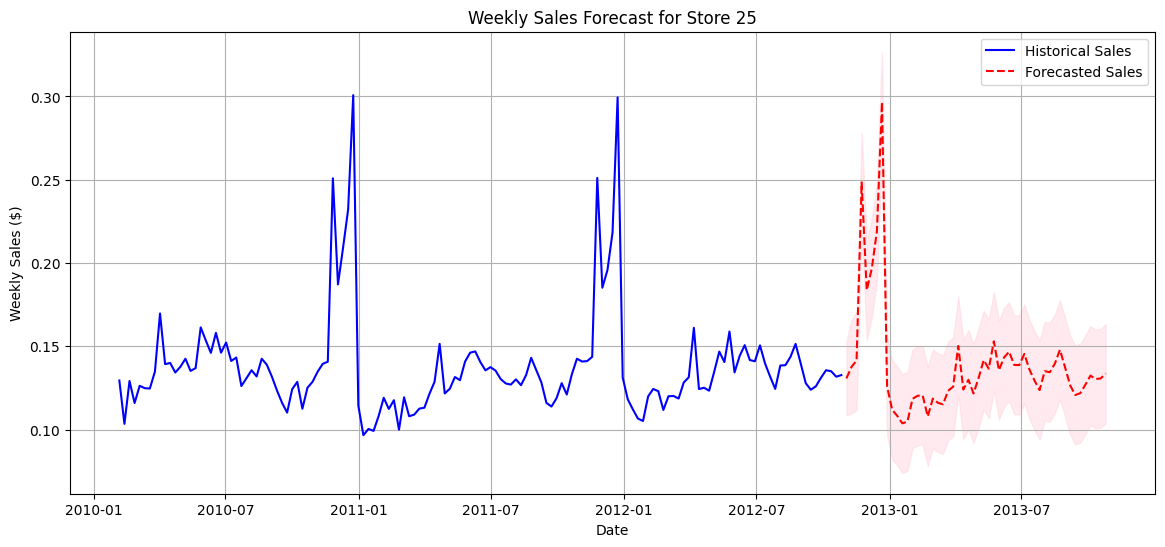

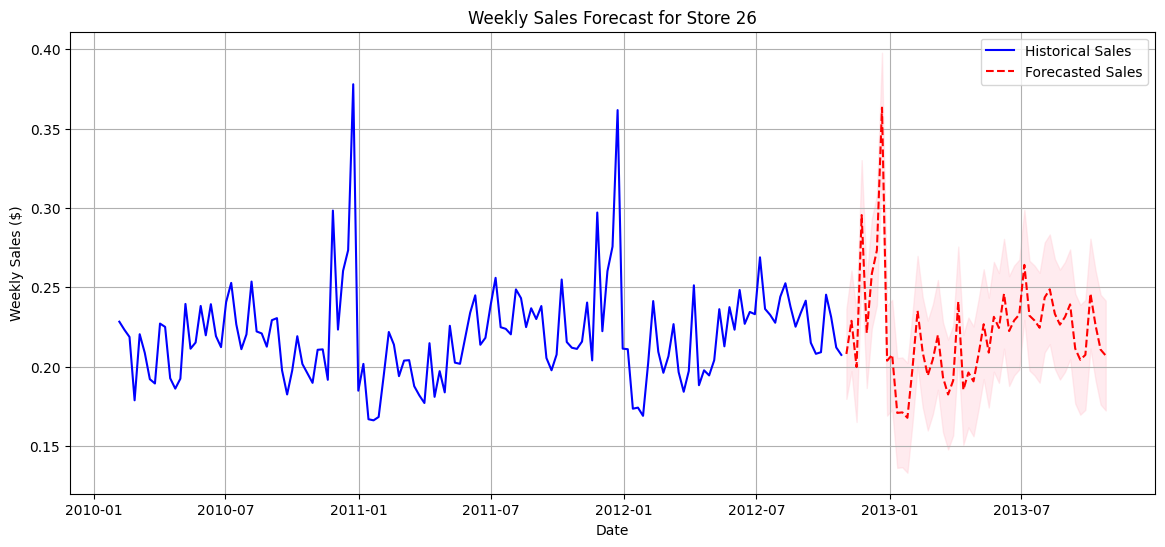

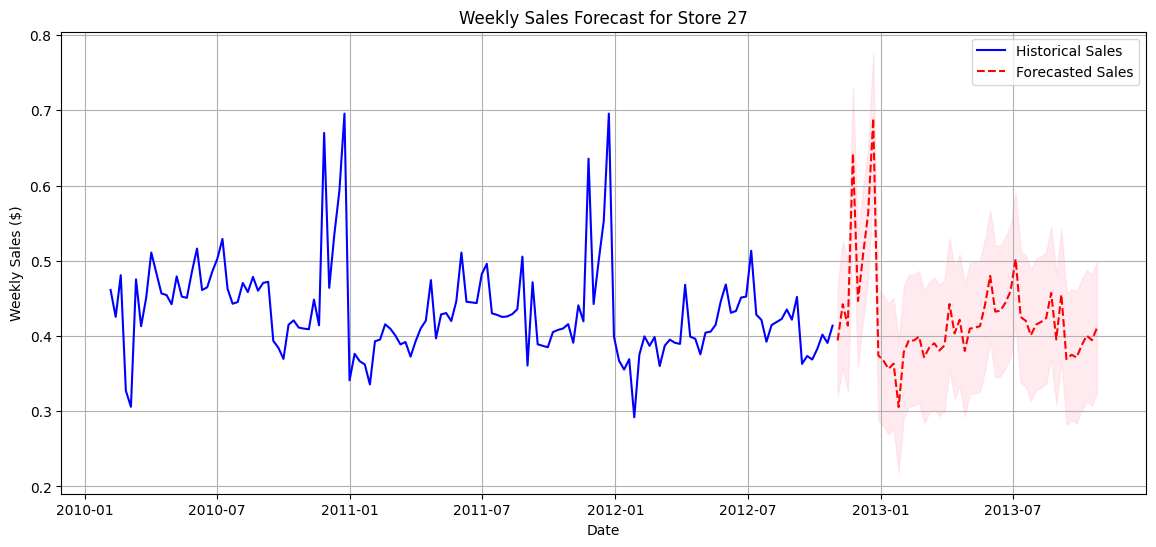

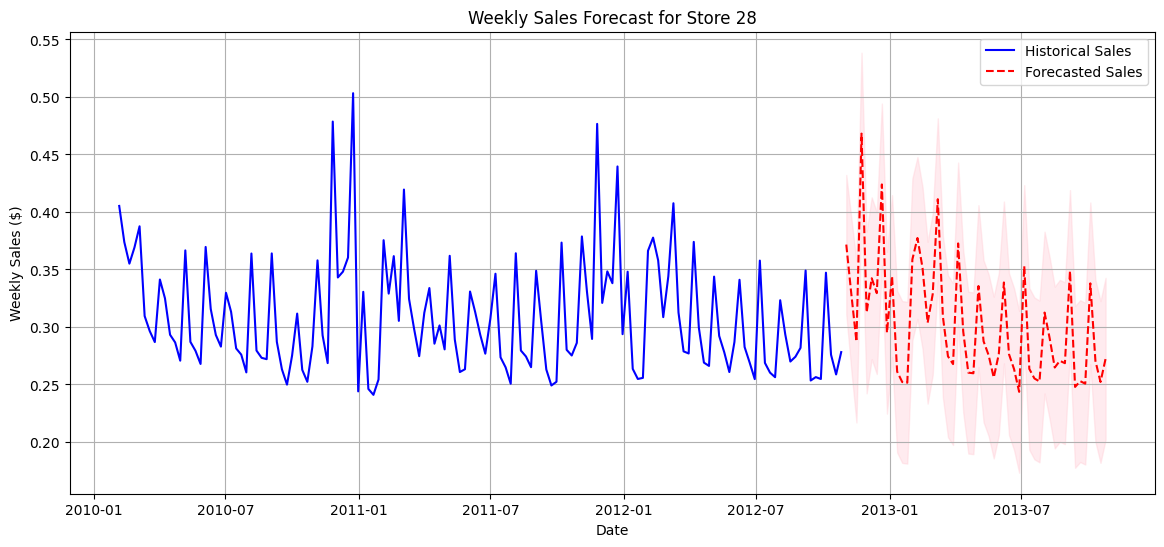

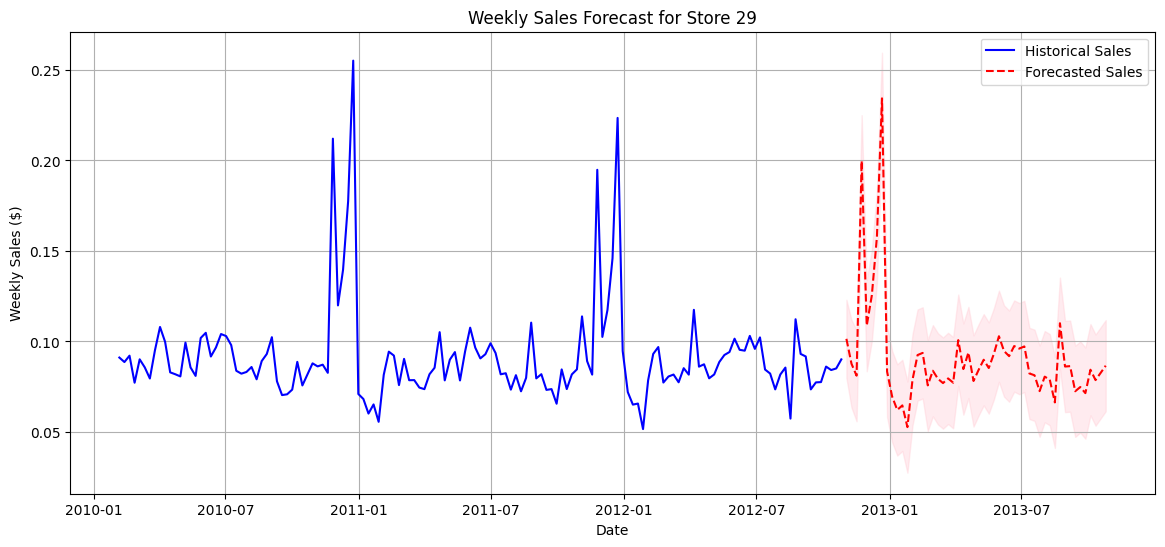

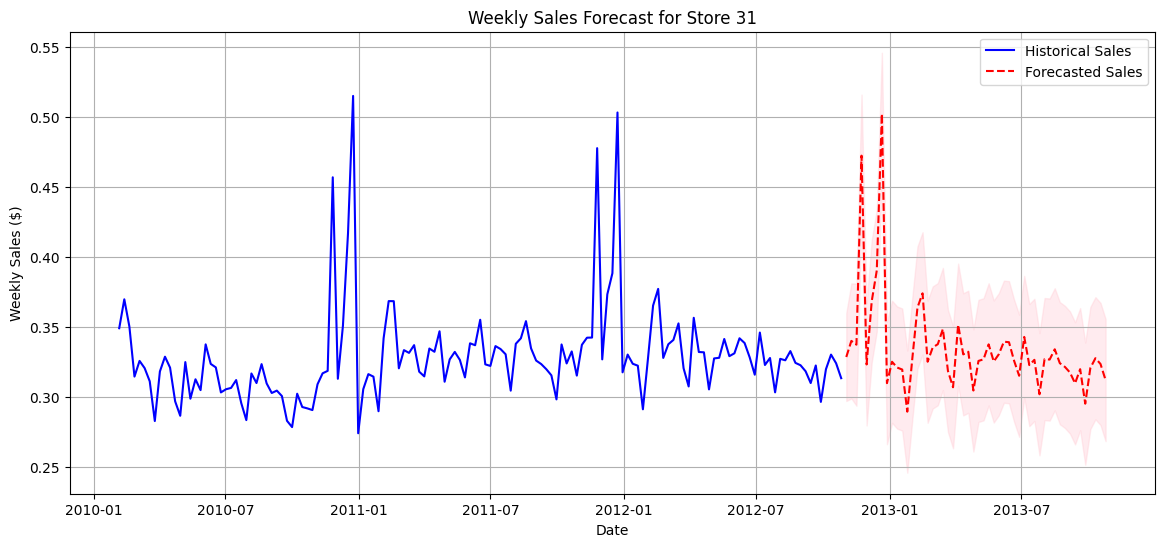

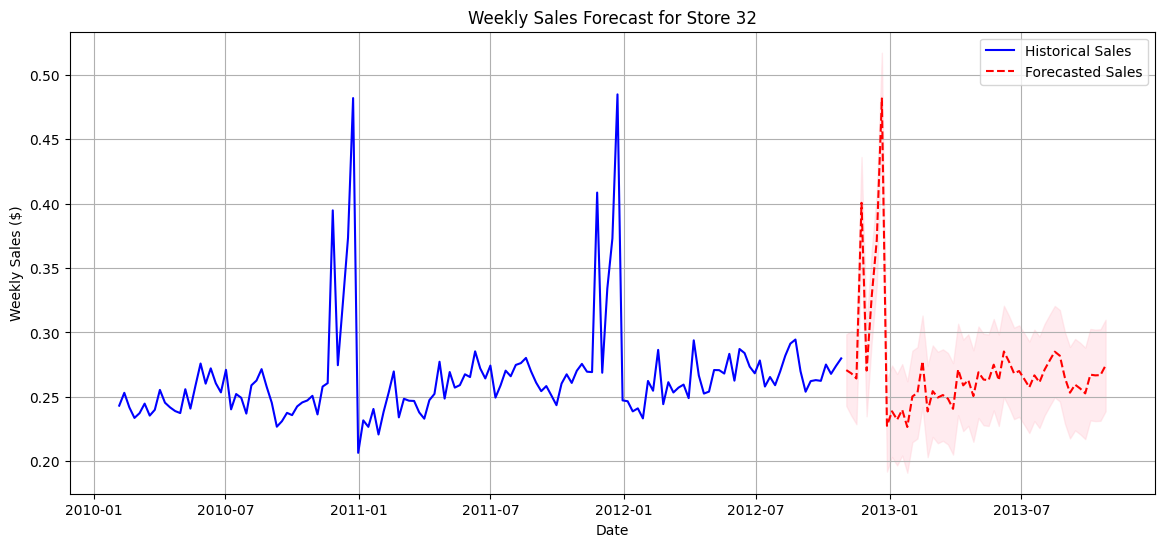

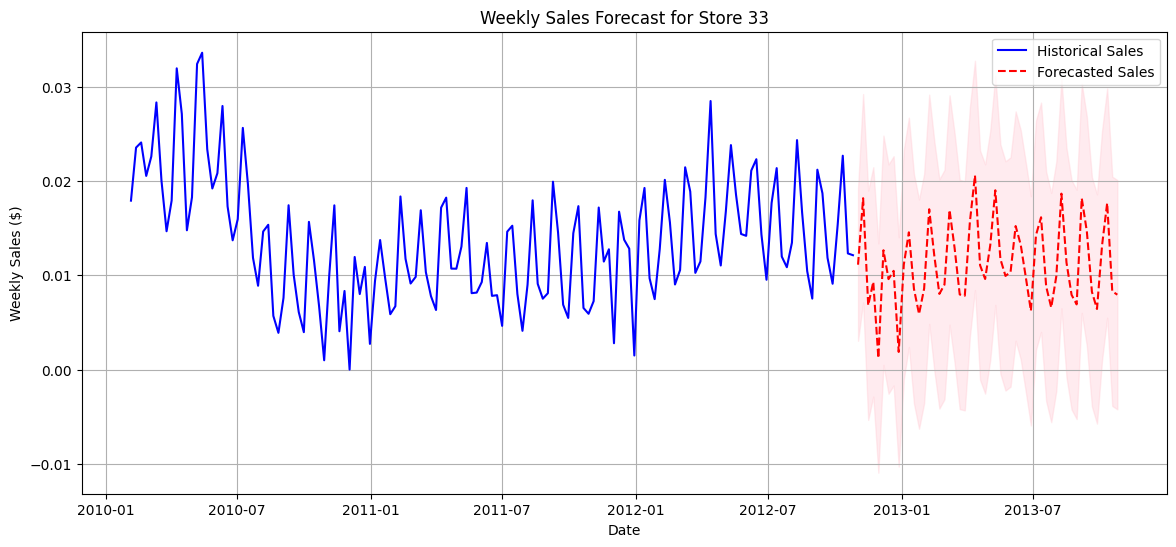

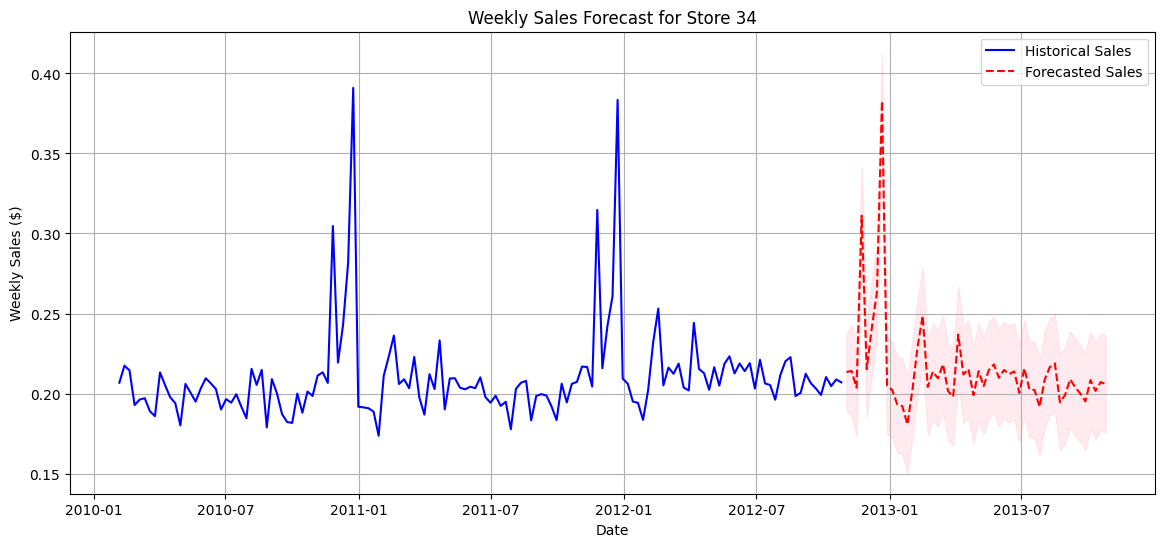

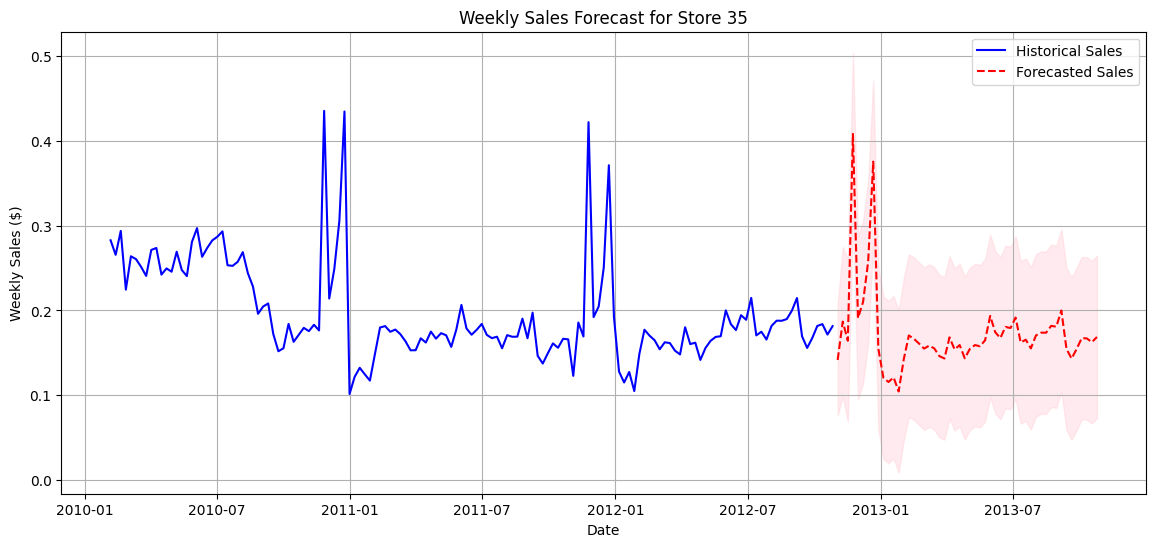

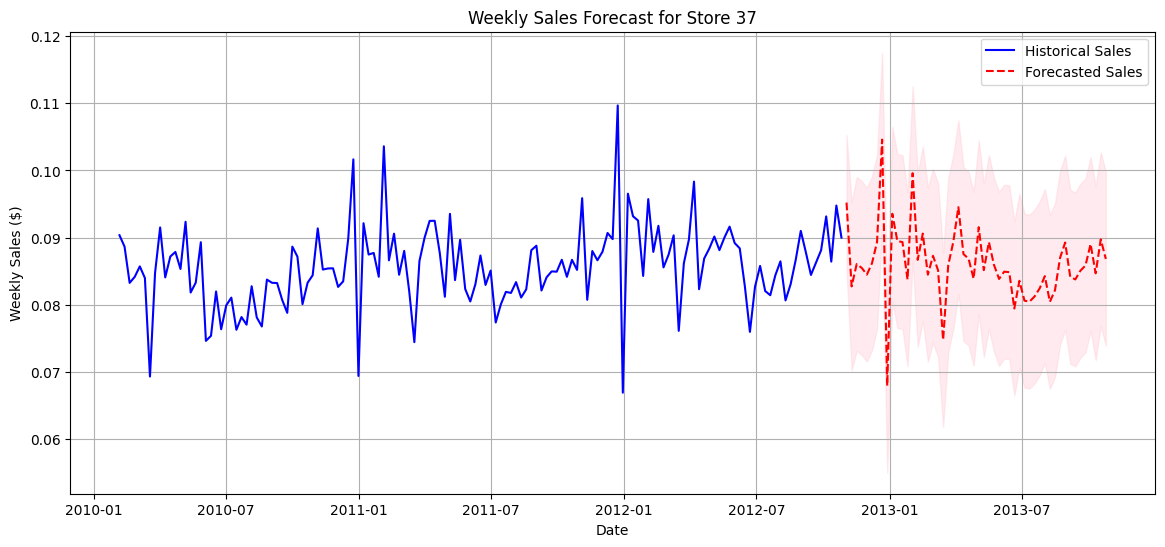

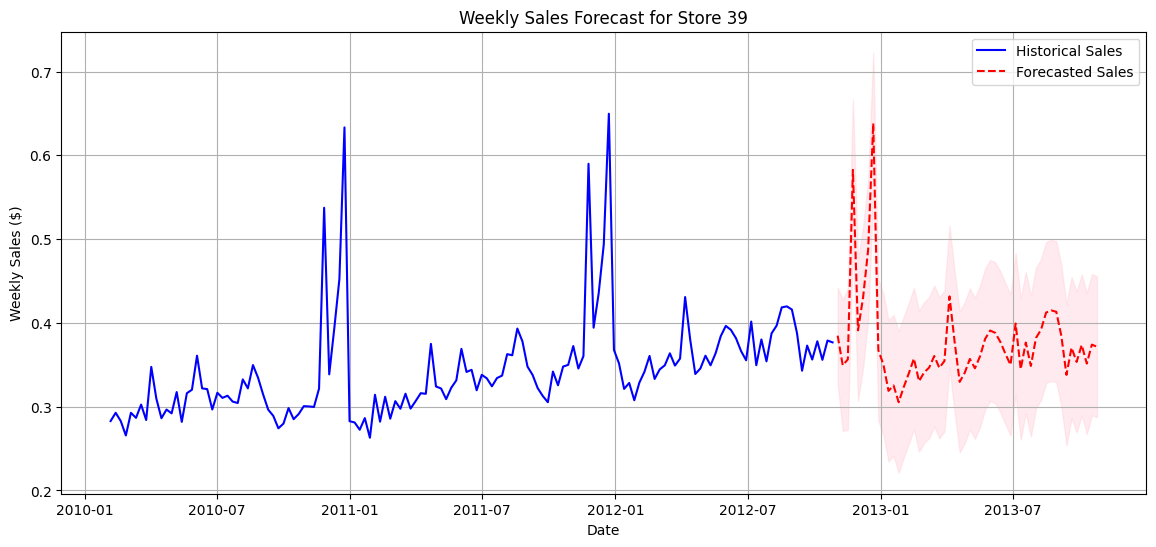

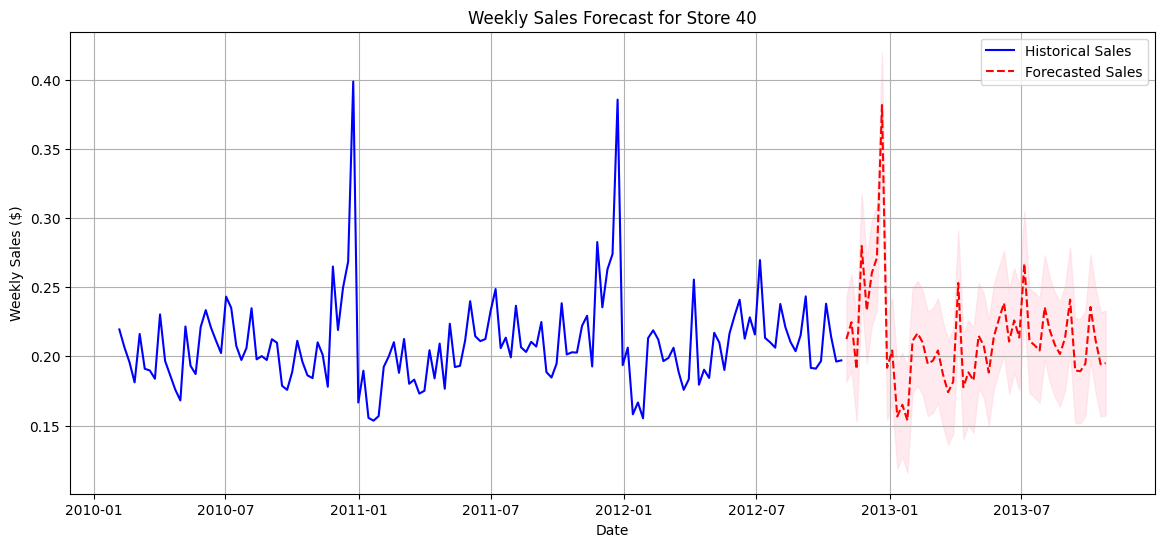

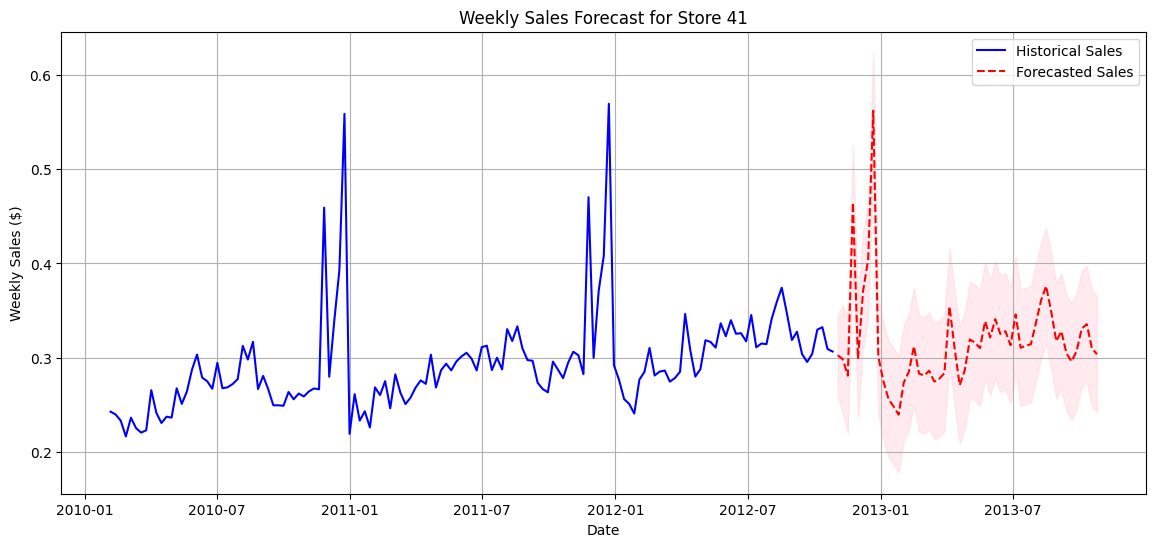

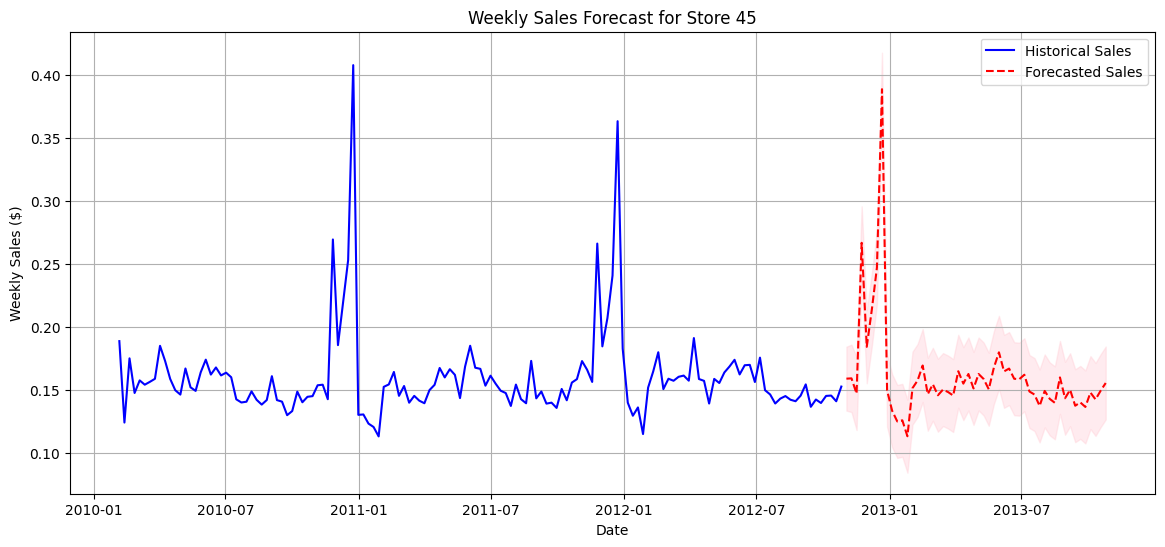

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
for store in walmartdata['Store'].unique():
    # Filter the data for the current store
    store_data = walmartdata[walmartdata['Store'] == store]

    weekly_sales = store_data['Weekly_Sales']

    # Define and fit the SARIMA model (you may need to tune these parameters)
    model = SARIMAX(weekly_sales, order=(0, 0, 2), seasonal_order=(2, 0, 0, 52))
    model_fit = model.fit()

    # Make predictions for the next 52 weeks
    predictions = model_fit.get_forecast(steps=52)

    # Create a plot for the current store
    plt.figure(figsize=(14, 6))
    plt.plot(weekly_sales, label='Historical Sales', color='blue')
    plt.plot(predictions.predicted_mean, label='Forecasted Sales', color='red', linestyle='--')

    # Adding confidence intervals to the plot
    conf_int = predictions.conf_int()
    plt.fill_between(conf_int.index,
                     conf_int.iloc[:, 0],
                     conf_int.iloc[:, 1], color='pink', alpha=0.3)

    # Formatting the plot
    plt.title(f'Weekly Sales Forecast for Store {store}')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales ($)')
    plt.legend()
    plt.grid()
    plt.show()

Model Evaluation Metrics

In [49]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions (adjust the steps based on your needs)
# Here, we predict the next 12 weeks
predictions = model_fit.get_forecast(steps=12)
predicted_mean = predictions.predicted_mean

# Create a DataFrame for the predictions
predicted_index = pd.date_range(start=weekly_sales.index[-1] + pd.Timedelta(weeks=1), periods=12, freq='W')
predicted_sales = pd.DataFrame({'Predicted_Sales': predicted_mean.values}, index=predicted_index)

# Assuming you have actual sales data for the next 12 weeks (you would replace this with your actual data)
# For demonstration, we will create a dummy actual sales array. Replace this with your actual values.
# Example: actual_sales = [actual_value_1, actual_value_2, ..., actual_value_12]
actual_sales = np.random.rand(12) * 1e6  # Dummy values, replace with actual values

# Create DataFrame for actual sales
actual_index = pd.date_range(start=weekly_sales.index[-1] + pd.Timedelta(weeks=1), periods=12, freq='W')
actual_sales_walmartdata = pd.DataFrame({'Actual_Sales': actual_sales}, index=actual_index)

# Combine actual and predicted data for evaluation
evaluation_walmartdata = pd.concat([actual_sales_walmartdata, predicted_sales], axis=1)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(evaluation_walmartdata['Actual_Sales'], evaluation_walmartdata['Predicted_Sales']))
mae = mean_absolute_error(evaluation_walmartdata['Actual_Sales'], evaluation_walmartdata['Predicted_Sales'])

# Output AIC, BIC, RMSE, and MAE
print(f"AIC: {model_fit.aic}")
print(f"BIC: {model_fit.bic}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

AIC: -589.3143582650372
BIC: -574.5001351137377
RMSE: 504856.1776504515
MAE: 423366.01127918693


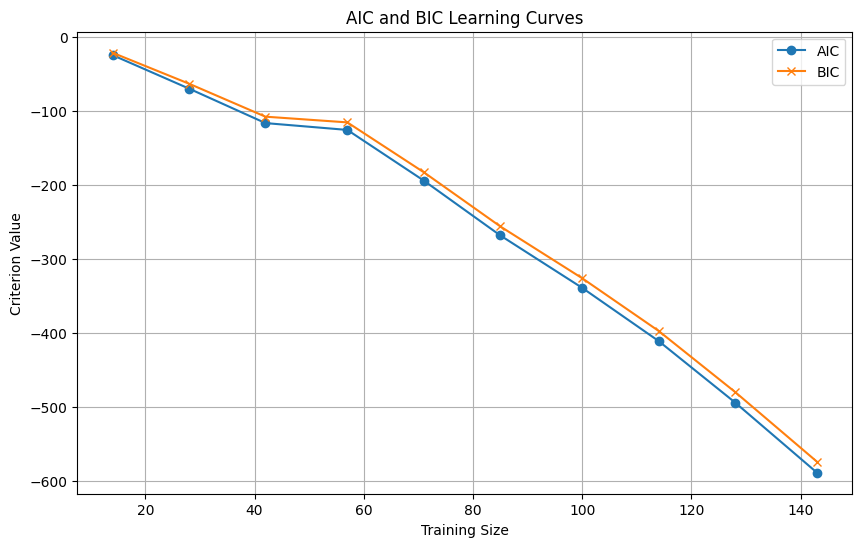

In [50]:
train_sizes = [int(len(weekly_sales) * frac) for frac in np.linspace(0.1, 1.0, 10)]

aic_values = []
bic_values = []

for size in train_sizes:
    # Train model on different sizes of data
    subset_data = weekly_sales.iloc[:size]
    model = SARIMAX(subset_data, order=(0, 0, 2), seasonal_order=(2, 0, 0, 52))
    model_fit_subset = model.fit(disp=False)

    # Store AIC and BIC values
    aic_values.append(model_fit_subset.aic)
    bic_values.append(model_fit_subset.bic)

# Plot the AIC and BIC learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, aic_values, label='AIC', marker='o')
plt.plot(train_sizes, bic_values, label='BIC', marker='x')
plt.title('AIC and BIC Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Criterion Value')
plt.legend()
plt.grid()
plt.show()


In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the model (example parameters, you may need to tune)
model = SARIMAX(weekly_sales, order=(3, 0, 0), seasonal_order=(1, 0, 0, 52))

# Fit the model
model_fit = model.fit()
print(model_fit.summary())


                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(3, 0, 0)x(1, 0, 0, 52)   Log Likelihood                 322.518
Date:                            Mon, 06 Jan 2025   AIC                           -635.036
Time:                                    06:21:33   BIC                           -620.222
Sample:                                02-05-2010   HQIC                          -629.016
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1439      0.061      2.367      0.018       0.025       0.263
ar.L2          0.4179      0.081   

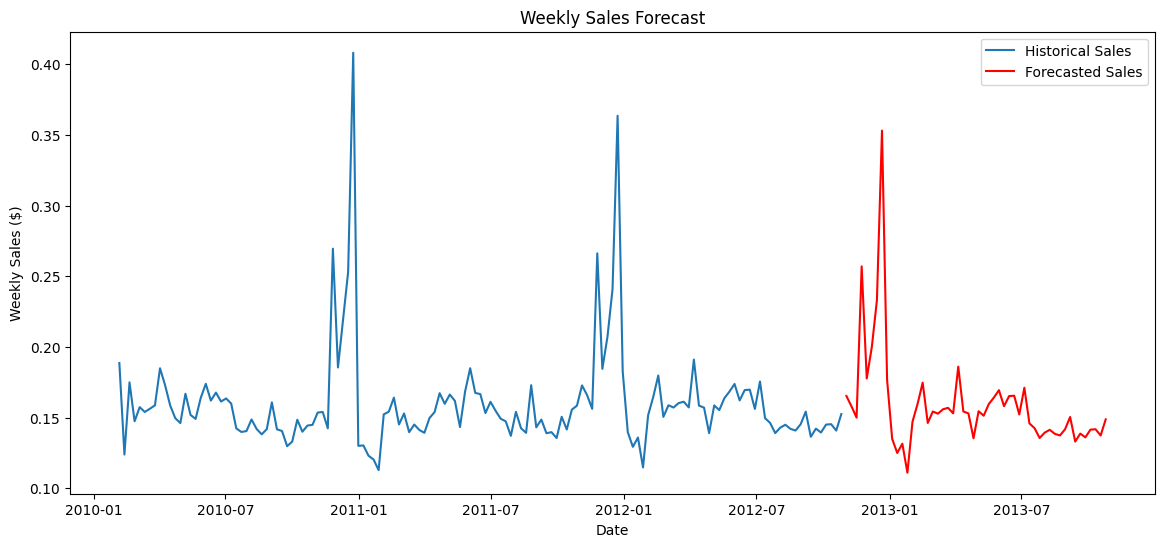

In [52]:
# Make predictions
predictions = model_fit.get_forecast(steps=52)  # forecasting next 12 weeks

# Plotting the predictions
plt.figure(figsize=(14, 6))
plt.plot(weekly_sales, label='Historical Sales')
plt.plot(predictions.predicted_mean, label='Forecasted Sales', color='red')
plt.title('Weekly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')
plt.legend()
plt.show()

In [53]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions (adjust the steps based on your needs)
# Here, we predict the next 12 weeks
predictions = model_fit.get_forecast(steps=12)
predicted_mean = predictions.predicted_mean

# Create a DataFrame for the predictions
predicted_index = pd.date_range(start=weekly_sales.index[-1] + pd.Timedelta(weeks=1), periods=12, freq='W')
predicted_sales = pd.DataFrame({'Forecasted Sales': predicted_mean.values}, index=predicted_index)

# Assuming you have actual sales data for the next 12 weeks (you would replace this with your actual data)
# For demonstration, we will create a dummy actual sales array. Replace this with your actual values.
# Example: actual_sales = [actual_value_1, actual_value_2, ..., actual_value_12]
actual_sales = np.random.rand(12) * 1e6  # Dummy values, replace with actual values

# Create DataFrame for actual sales
actual_index = pd.date_range(start=weekly_sales.index[-1] + pd.Timedelta(weeks=1), periods=12, freq='W')
actual_sales_walmartdata = pd.DataFrame({'Historical Sales': actual_sales}, index=actual_index)

# Combine actual and predicted data for evaluation
evaluation_walmartdata = pd.concat([actual_sales_walmartdata, predicted_sales], axis=1)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(evaluation_walmartdata['Historical Sales'], evaluation_walmartdata['Forecasted Sales']))
mae = mean_absolute_error(evaluation_walmartdata['Historical Sales'], evaluation_walmartdata['Forecasted Sales'])

# Output AIC, BIC, RMSE, and MAE
print(f"AIC: {model_fit.aic}")
print(f"BIC: {model_fit.bic}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

AIC: -635.0360140328187
BIC: -620.2217908815192
RMSE: 491173.94625658466
MAE: 382670.34632421535


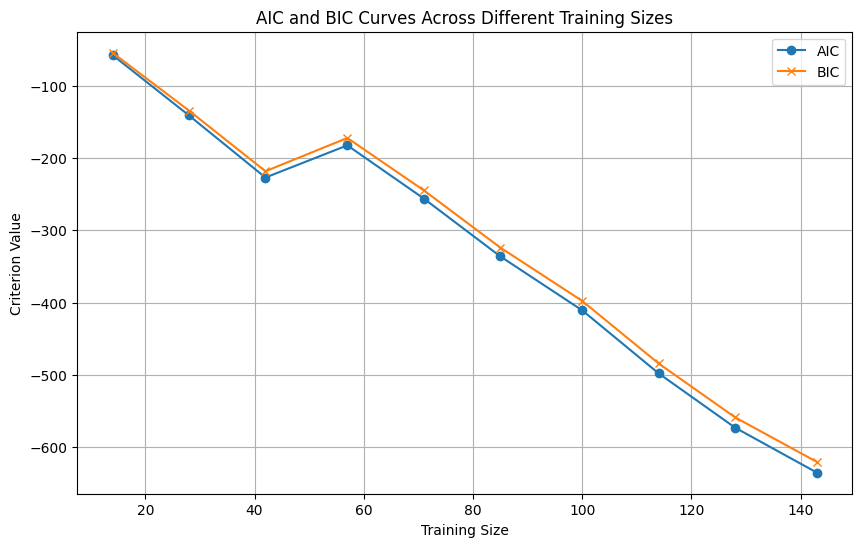

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store AIC and BIC values
aic_values = []
bic_values = []
train_sizes = [int(len(weekly_sales) * frac) for frac in np.linspace(0.1, 1.0, 10)]

# Train SARIMAX model on different data sizes
for size in train_sizes:
    subset_data = weekly_sales.iloc[:size]

    # Define and fit the SARIMAX model
    model = SARIMAX(subset_data, order=(3, 0, 0), seasonal_order=(1, 0, 0, 52))
    model_fit = model.fit(disp=False)

    # Store AIC and BIC values
    aic_values.append(model_fit.aic)
    bic_values.append(model_fit.bic)

# Plot AIC and BIC curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, aic_values, label='AIC', marker='o')
plt.plot(train_sizes, bic_values, label='BIC', marker='x')
plt.title('AIC and BIC Curves Across Different Training Sizes')
plt.xlabel('Training Size')
plt.ylabel('Criterion Value')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the model (example parameters, you may need to tune)
model = SARIMAX(weekly_sales, order=(1, 0, 1), seasonal_order=(1, 0, 0, 52))

# Fit the model
model_fit = model.fit()
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                        Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 52)   Log Likelihood                 341.134
Date:                             Fri, 03 Jan 2025   AIC                           -674.267
Time:                                     06:52:19   BIC                           -662.416
Sample:                                 02-05-2010   HQIC                          -669.451
                                      - 10-26-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9879      0.007    134.039      0.000       0.973       1.002
ma.L1         -0.7800      

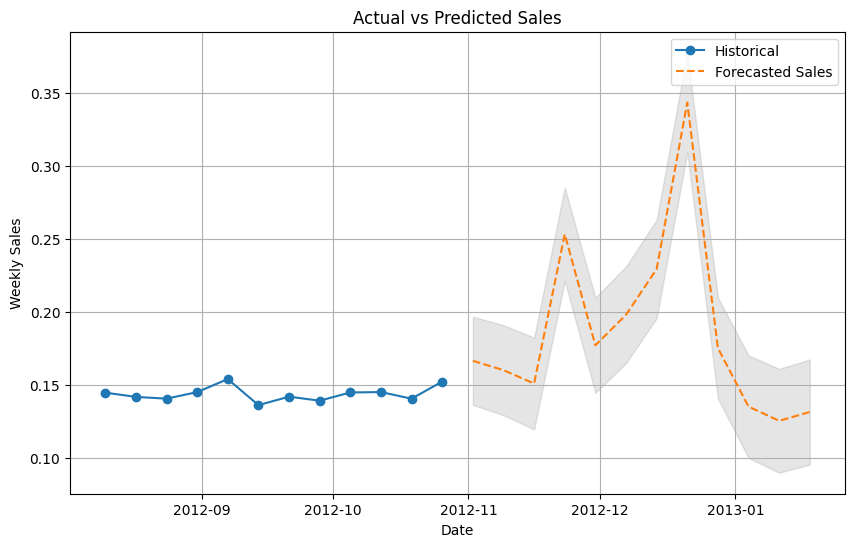

In [ ]:
# Forecast the next 12 weeks (or desired steps)
forecast_steps = 12
predictions = model_fit.get_forecast(steps=forecast_steps)
predicted_mean = predictions.predicted_mean
conf_int = predictions.conf_int()

# Extract actual sales for comparison
actual_sales = weekly_sales[-forecast_steps:]  # Last 12 weeks of actual data

# Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.plot(actual_sales.index, actual_sales, label='Historical', marker='o')
plt.plot(predicted_mean.index, predicted_mean, label='Forecasted Sales', linestyle='--')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.2)  # Confidence interval
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid()
plt.show()




In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions (adjust the steps based on your needs)
# Here, we predict the next 12 weeks
predictions = model_fit.get_forecast(steps=12)
predicted_mean = predictions.predicted_mean

# Create a DataFrame for the predictions
predicted_index = pd.date_range(start=weekly_sales.index[-1] + pd.Timedelta(weeks=1), periods=12, freq='W')
predicted_sales = pd.DataFrame({'Predicted_Sales': predicted_mean.values}, index=predicted_index)

# Assuming you have actual sales data for the next 12 weeks (you would replace this with your actual data)
# For demonstration, we will create a dummy actual sales array. Replace this with your actual values.
# Example: actual_sales = [actual_value_1, actual_value_2, ..., actual_value_12]
actual_sales = np.random.rand(12) * 1e6  # Dummy values, replace with actual values

# Create DataFrame for actual sales
actual_index = pd.date_range(start=weekly_sales.index[-1] + pd.Timedelta(weeks=1), periods=12, freq='W')
actual_sales_walmartdata = pd.DataFrame({'Actual_Sales': actual_sales}, index=actual_index)

# Combine actual and predicted data for evaluation
evaluation_walmartdata = pd.concat([actual_sales_walmartdata, predicted_sales], axis=1)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(evaluation_walmartdata['Actual_Sales'], evaluation_walmartdata['Predicted_Sales']))
mae = mean_absolute_error(evaluation_walmartdata['Actual_Sales'], evaluation_walmartdata['Predicted_Sales'])

# Output AIC, BIC, RMSE, and MAE
print(f"AIC: {model_fit.aic}")
print(f"BIC: {model_fit.bic}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

AIC: -674.2673117948646
BIC: -662.415933273825
RMSE: 430211.96438045043
MAE: 352940.89726264955


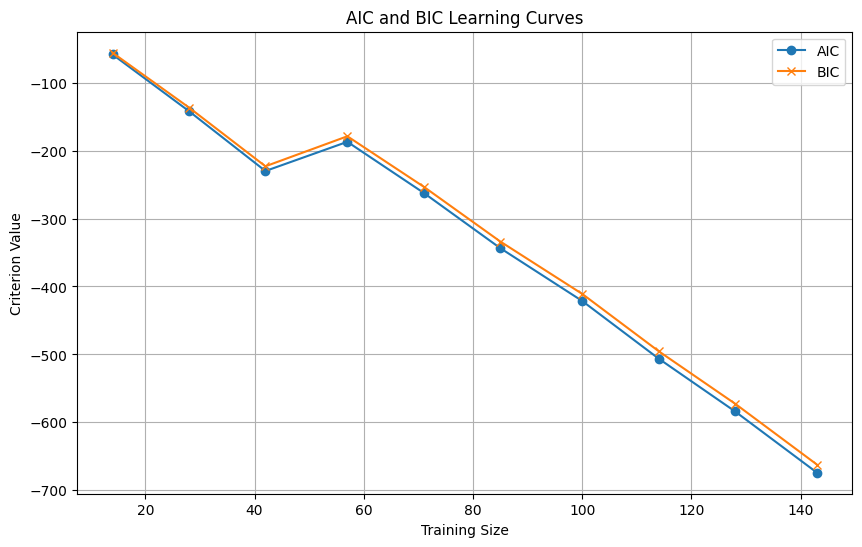

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Initialize lists to store AIC, BIC, and RMSE values
train_sizes = [int(len(weekly_sales) * frac) for frac in np.linspace(0.1, 1.0, 10)]
aic_values = []
bic_values = []
rmse_values = []

# Loop over different training sizes
for size in train_sizes:
    # Subset data for increasing sizes
    subset_data = weekly_sales.iloc[:size]

    # Fit SARIMAX model
    model = SARIMAX(subset_data, order=(1, 0, 1), seasonal_order=(1, 0, 0, 52))
    model_fit = model.fit(disp=False)

    # Store AIC and BIC values
    aic_values.append(model_fit.aic)
    bic_values.append(model_fit.bic)

    # Forecast for the last available period in the subset
    forecast = model_fit.forecast(steps=12)

    # Compare with actual values (limit by subset size to avoid mismatch)
    actual_values = weekly_sales[size:size+12]
    actual_values = actual_values[:len(forecast)]

    # Calculate RMSE if actual data exists
    if len(actual_values) == len(forecast):
        rmse = np.sqrt(mean_squared_error(actual_values, forecast))
        rmse_values.append(rmse)
    else:
        rmse_values.append(np.nan)  # Fill with NaN for incomplete periods

# Plot AIC and BIC Learning Curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, aic_values, label='AIC', marker='o')
plt.plot(train_sizes, bic_values, label='BIC', marker='x')
plt.title('AIC and BIC Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Criterion Value')
plt.legend()
plt.grid()
plt.show()

